# Post Analysis

**This notebook is used to analyze the different posts done during the communication campaign**

## Import libraries

In [1]:
# Import standard libraries
import os

In [2]:
# Import librairies for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
# Import internal modules
from src import plot
from src import utility
from src import features

ModuleNotFoundError: No module named 'src'

## Upload data

In [ ]:
# Specifiy here the path your data and image folder
DATA_PATH = f'{os.getcwd()}/data'
IMG_PATH = f'{os.getcwd()}/img'

In [ ]:
# Specifiy here the name of the file you want to use for this analysis
POST_FILE = 'instagram-posts_2023-08-07_2023-09-15.csv'
REEL_FILE = 'instagram-reels_2023-08-07_2023-09-15.csv'
STORY_FILE = 'instagram-stories_2023-08-07_2023-09-15.csv'

In [ ]:
# Upload the data and put date as index (rows are sorted by date)
df1 = utility.read_file(POST_FILE, date_col='Timestamp', data_path=DATA_PATH)
df2 = utility.read_file(REEL_FILE, date_col='Date', data_path=DATA_PATH)
df3 = utility.read_file(STORY_FILE, date_col='Timestamp', data_path=DATA_PATH)

In [ ]:
# Put the dataframe in a dictionnary (used to apply functions to the different dataset in parallel)
dfs_dict = {'post':df1, 'reel':df2, 'story':df3}

## Add features

In [ ]:
# Set the numero of post for each publication
features.set_publication_numero(dfs_dict)

In [ ]:
# Count the number of characters for each publication
features.count_content_length(dfs_dict)

In [ ]:
# Count the time between the actual and the last publication
features.time_since_last_publication(dfs_dict)

In [ ]:
# Add an URL column to have a primary key for each dataset
df3['URL'] = df3['Post URL']

## Process data

In [ ]:
## Concat the different dataframe into a single one
df = pd.concat([df1,df2,df3], axis=0)
# Sort by dates
df.sort_index(inplace=True)

In [ ]:
# Visualize the different columns provided
df.columns

Index(['Id', 'Type', 'Image', 'URL', 'Content', 'Impressions (Organic)',
       'Impressions (Paid)', 'Reach (Organic)', 'Reach (Paid)', 'Likes',
       'Saved', 'Comments', 'Clicks', 'Interactions', 'Engagement',
       'Video Views (Organic)', 'Video Views (Paid)', 'Post clicks (Paid)',
       'Post Interactions (Paid)', 'Spend', 'publication_number',
       'content_length', 'time_last_publication', 'Title', 'Likes (Organic)',
       'Saved (Organic)', 'Comments (Organic)', 'Interactions (Organic)',
       'Interactions (Paid)', 'Post URL', 'Media URL', 'Replies', 'Taps Back',
       'Taps Forward', 'Exits'],
      dtype='object')

In [ ]:
# Put the dataframe in a dictionnary (used to apply functions to the different dataset in parallel)
df_dict = {'global':df}

In [ ]:
# Set the numero of post for each publication
features.set_publication_numero(df_dict)
# Count the time between the actual and the last publication
features.time_since_last_publication(df_dict)

## Explore

In [ ]:
col = 'Reach (Organic)'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


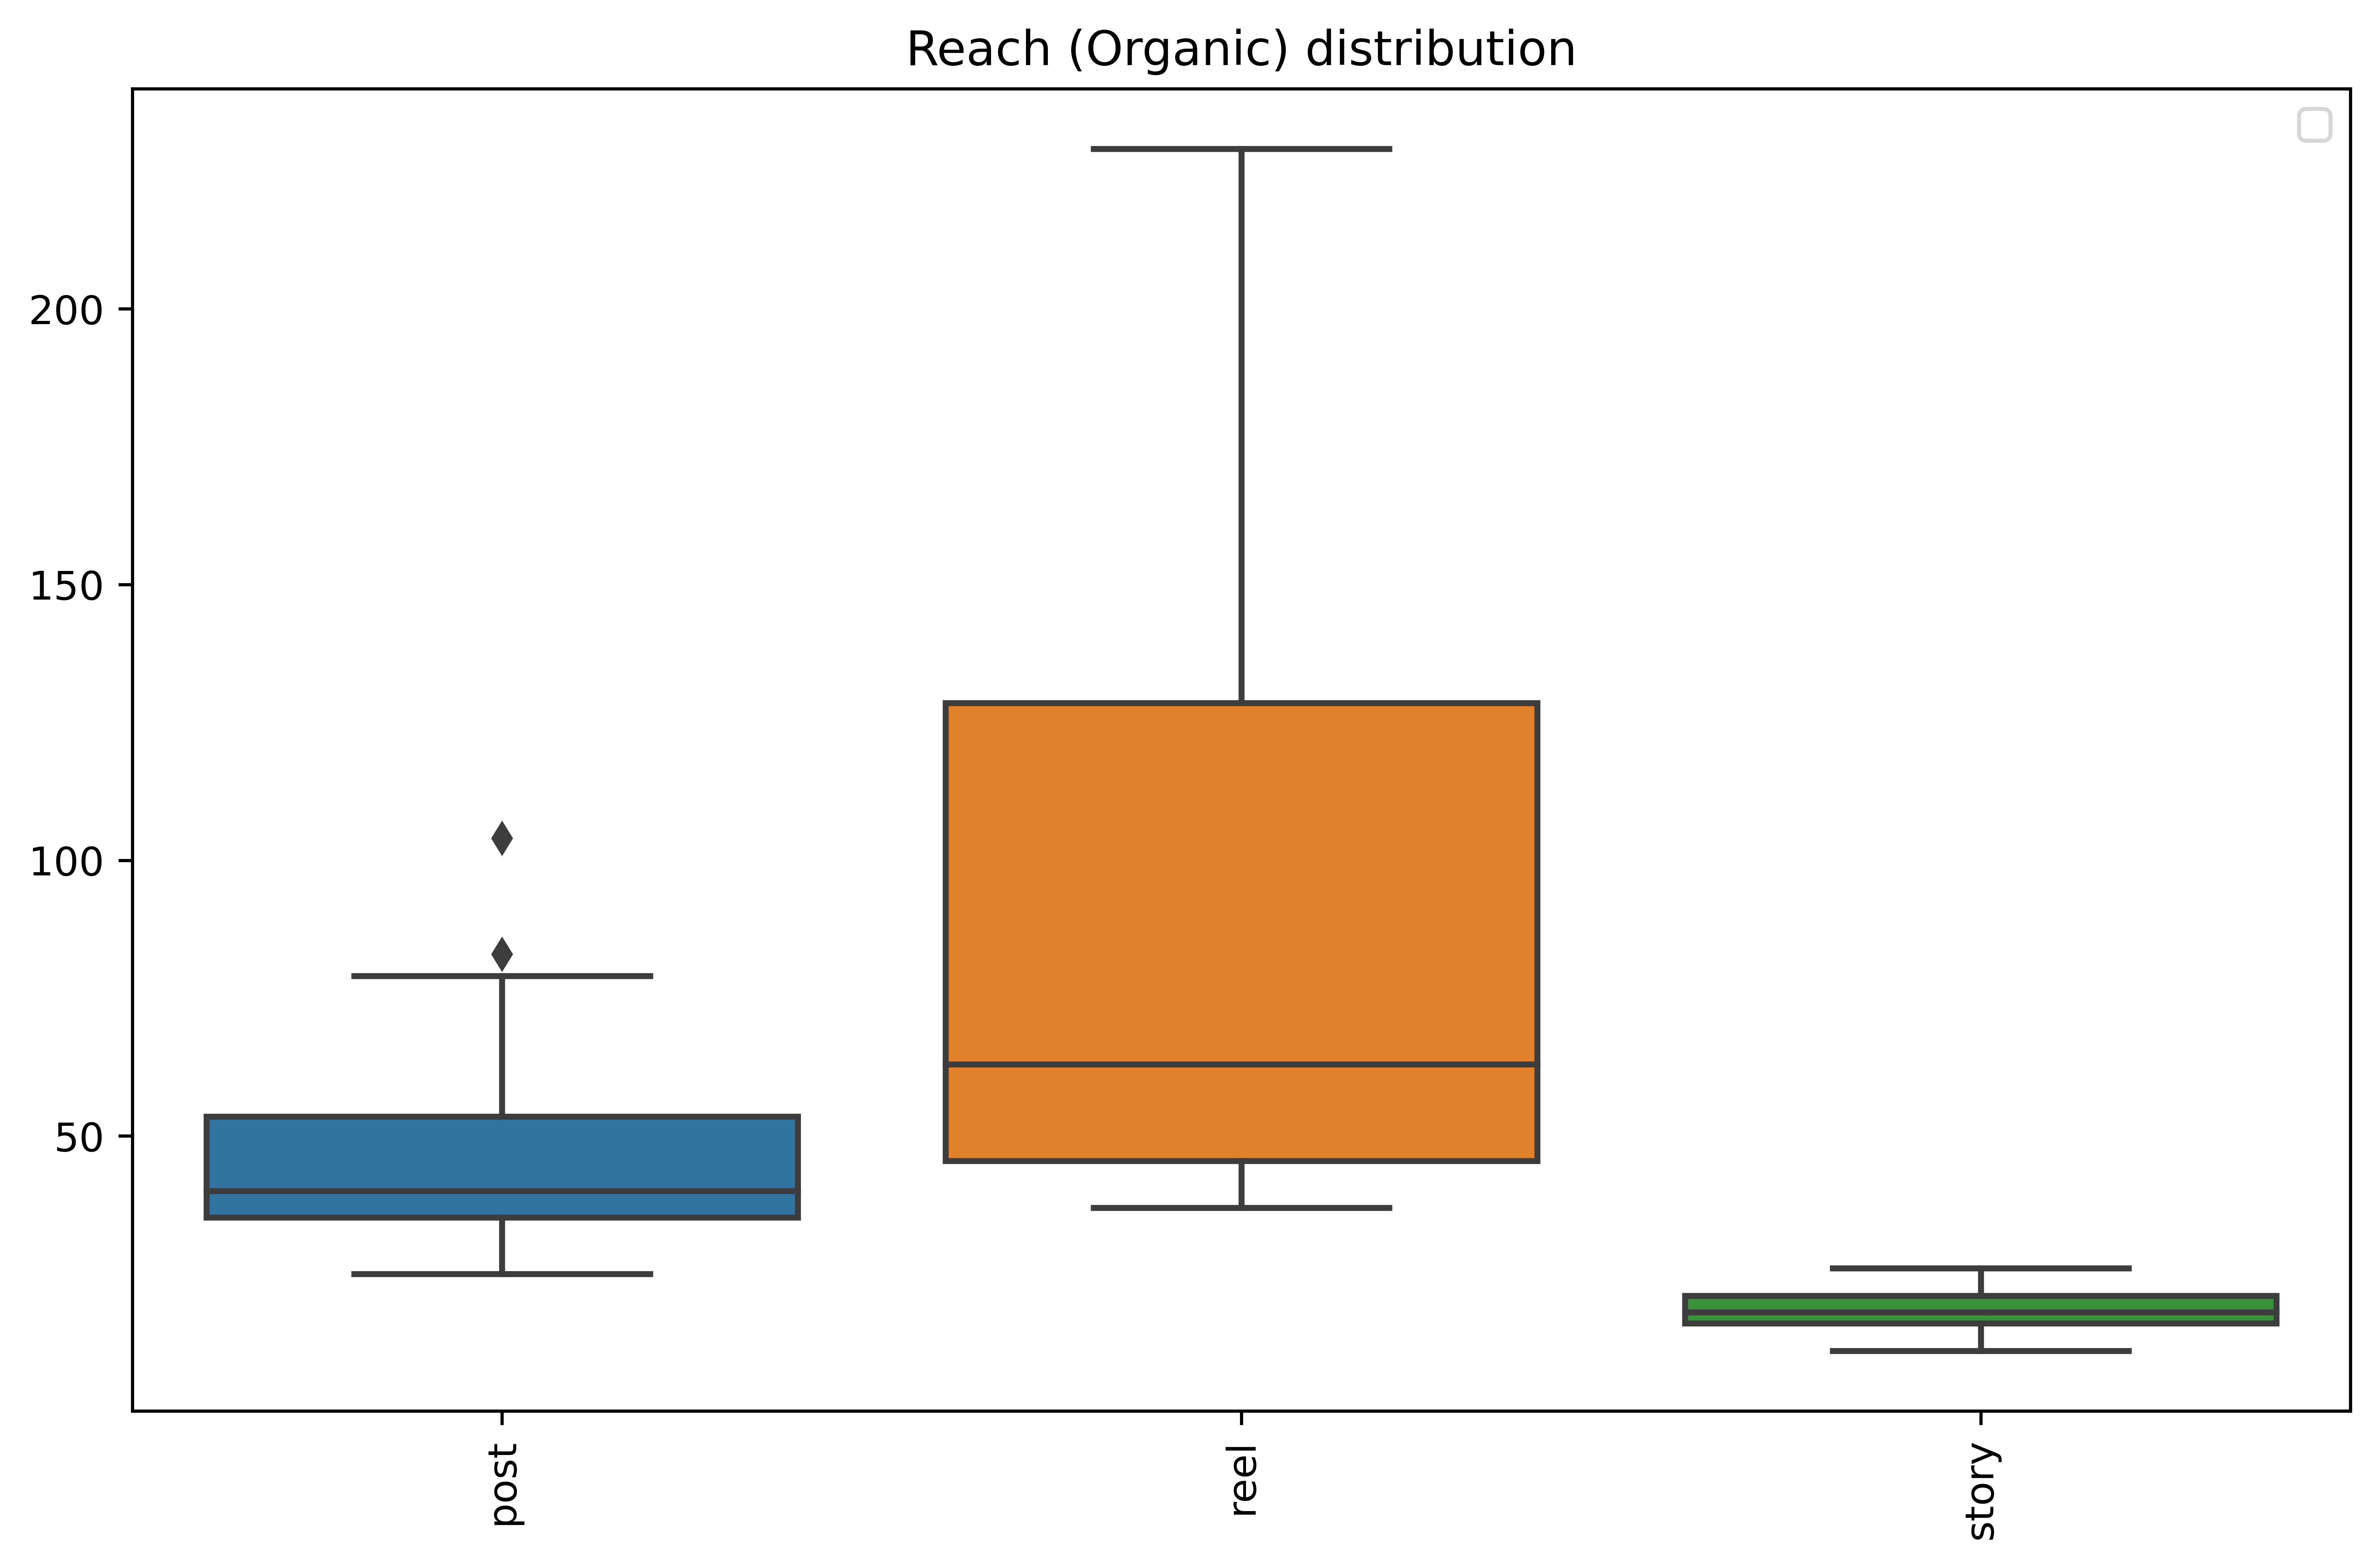

In [ ]:
plot.mean_plot(dfs_dict, col, save_img_path=f'{IMG_PATH}')

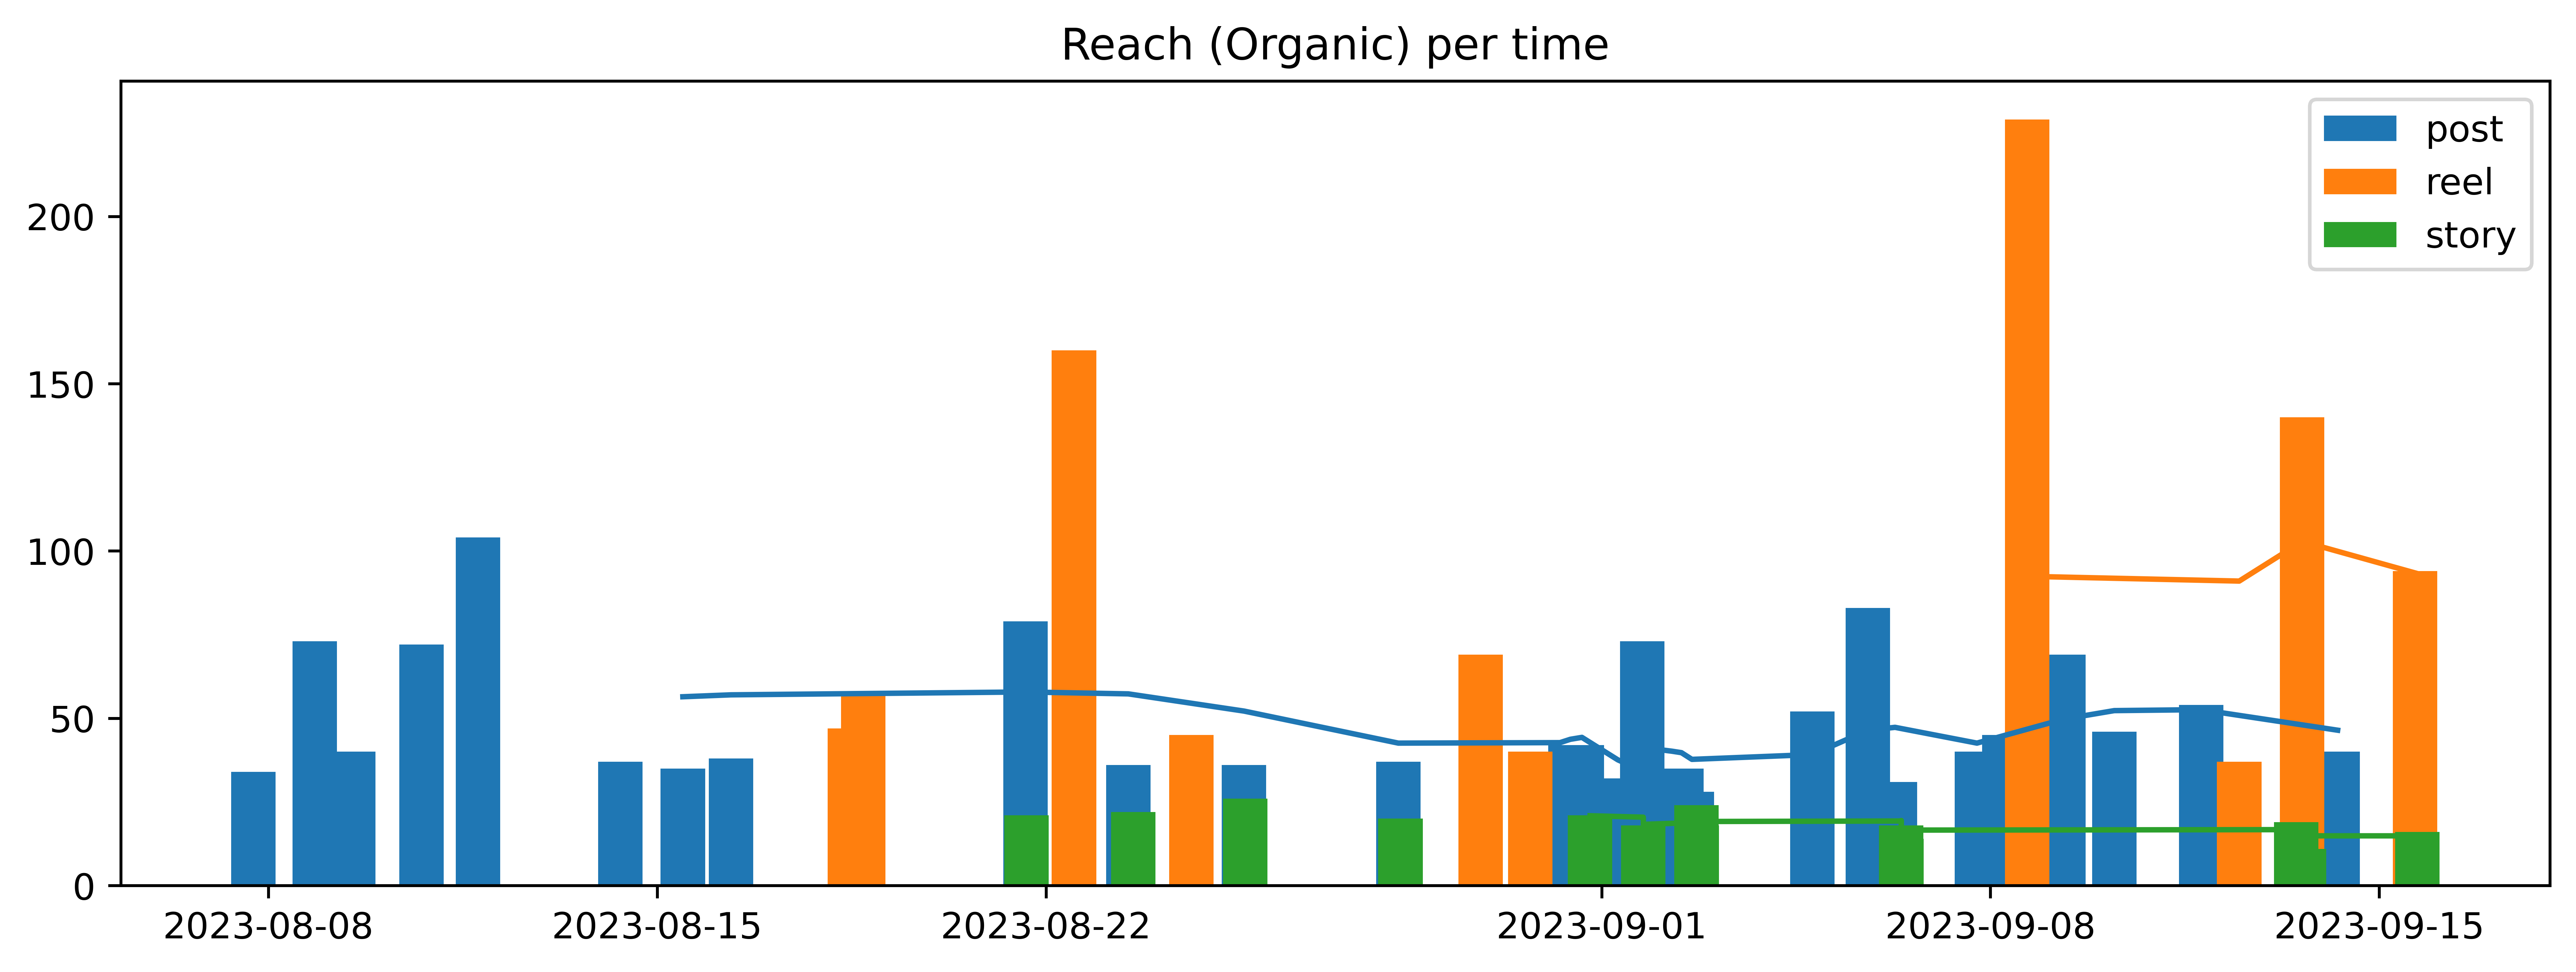

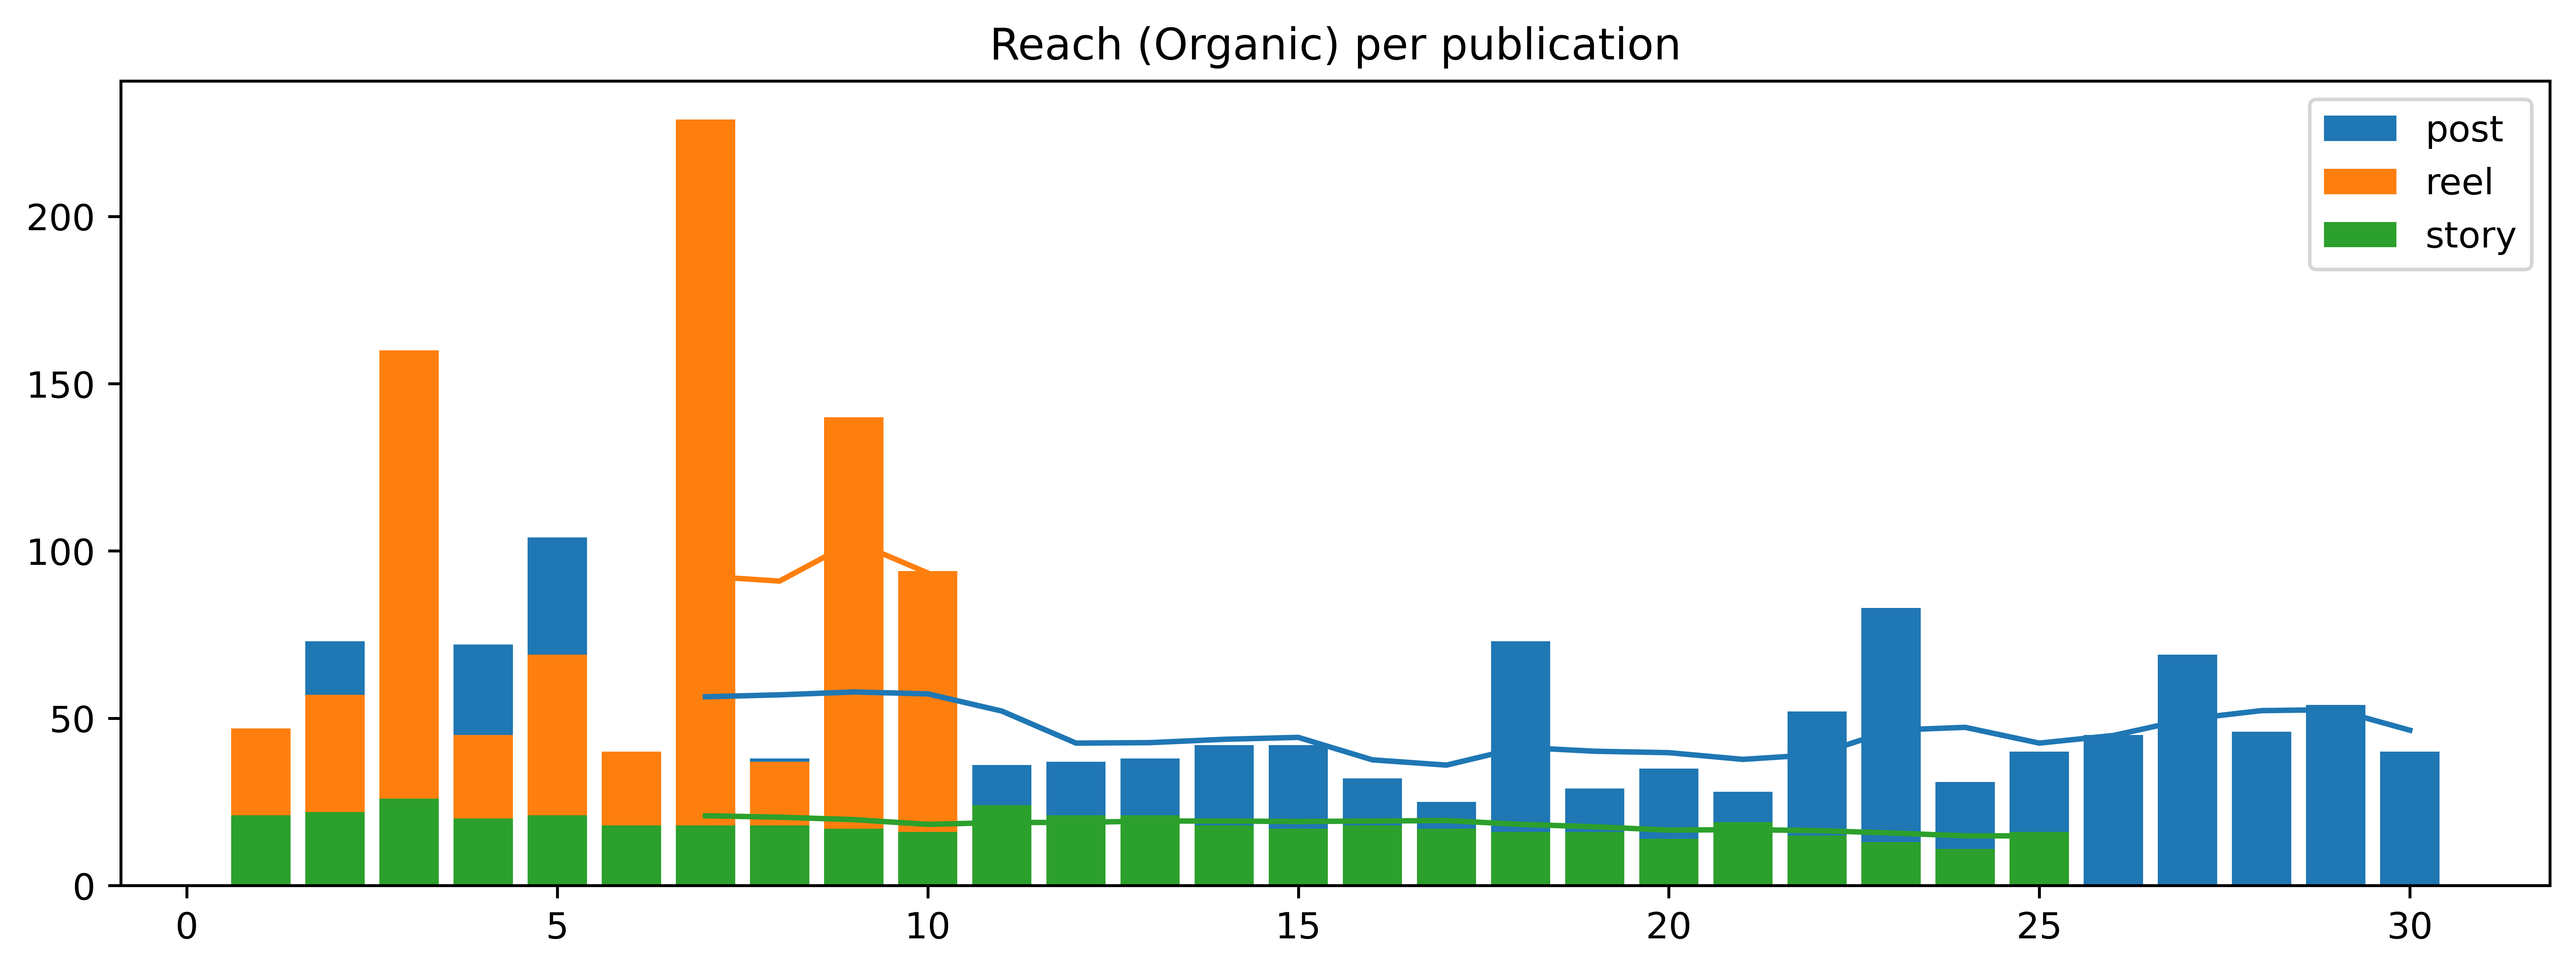

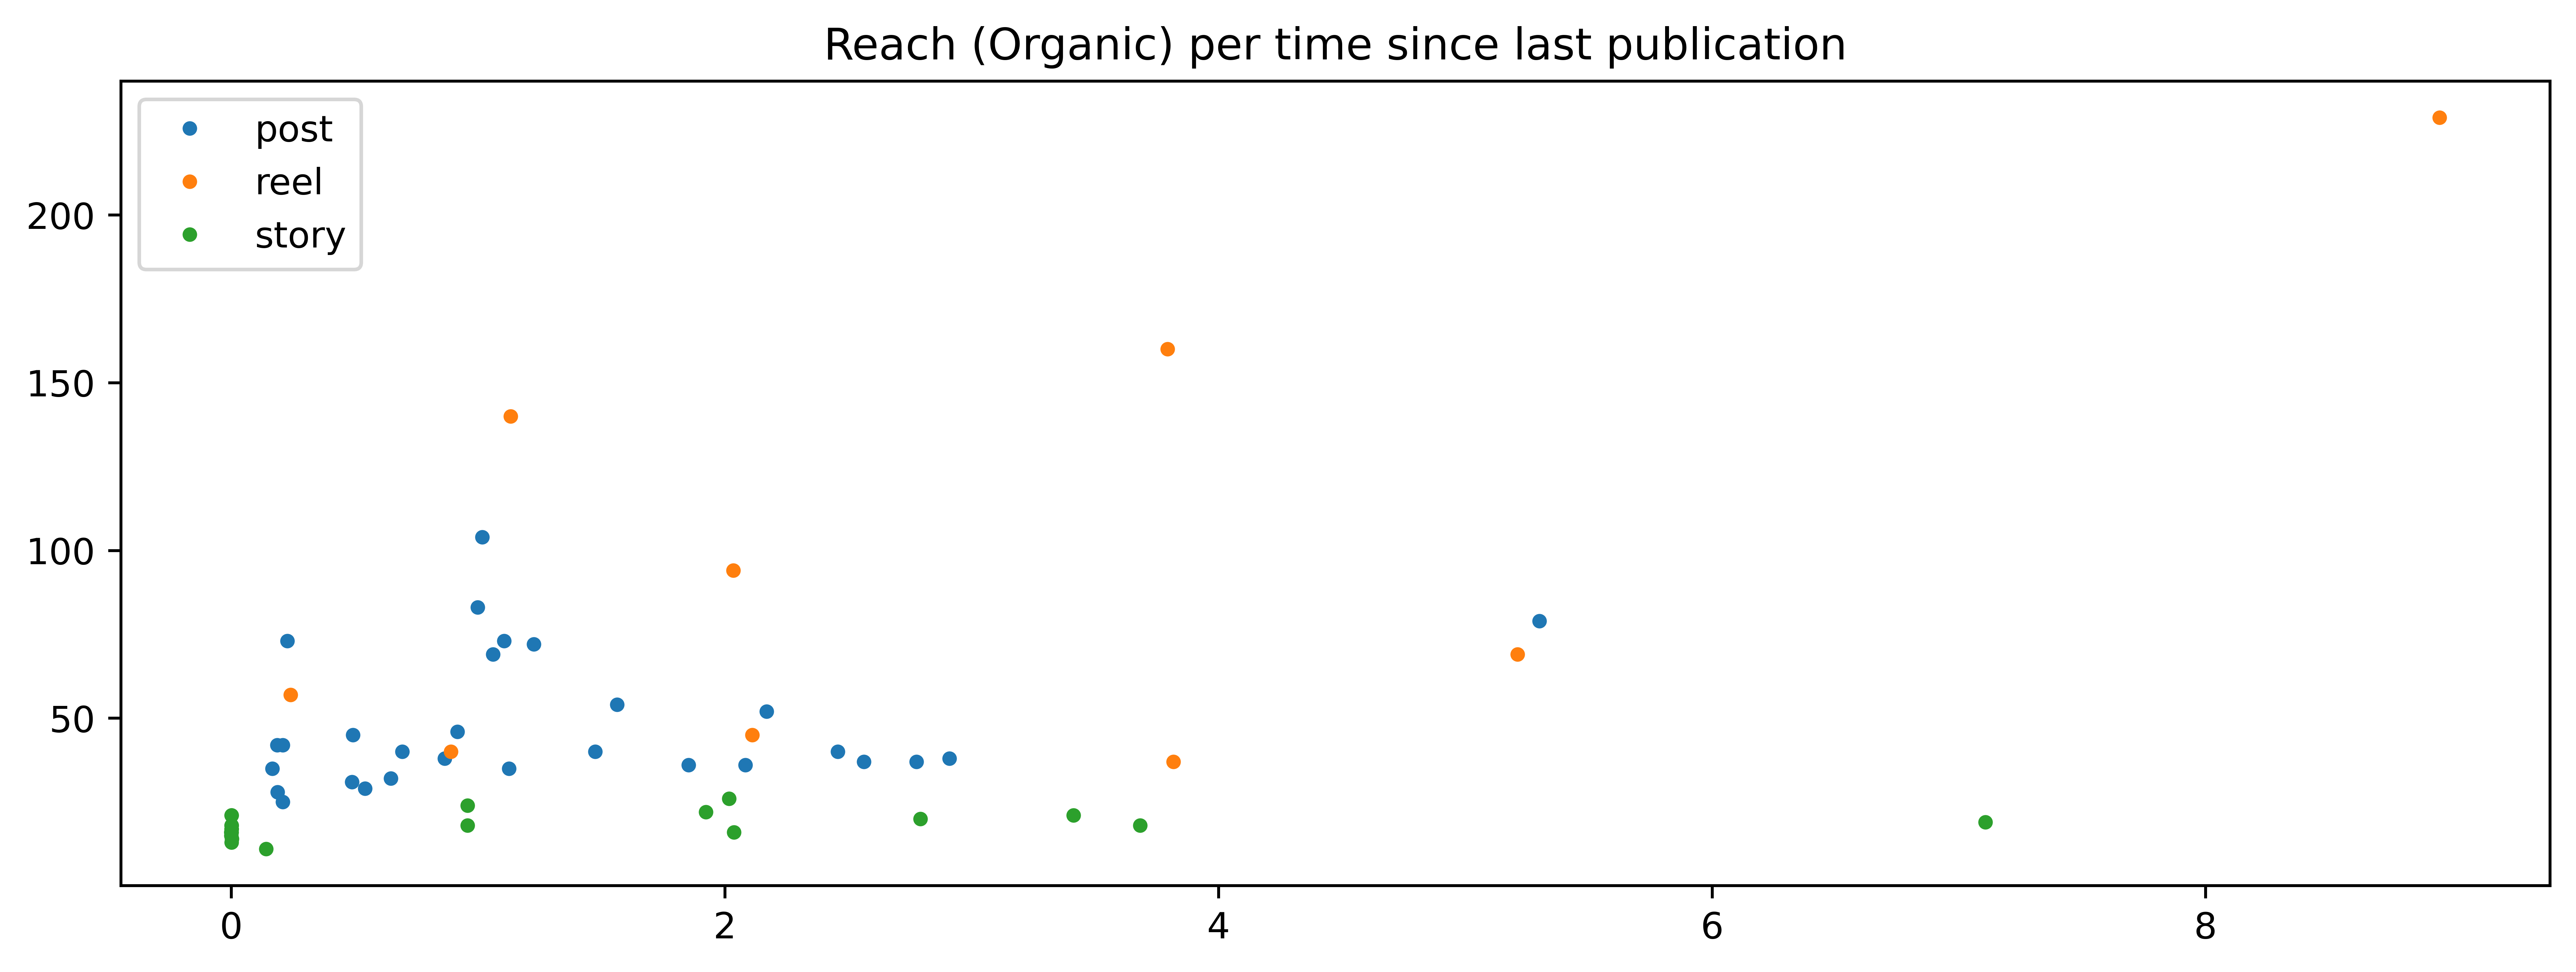

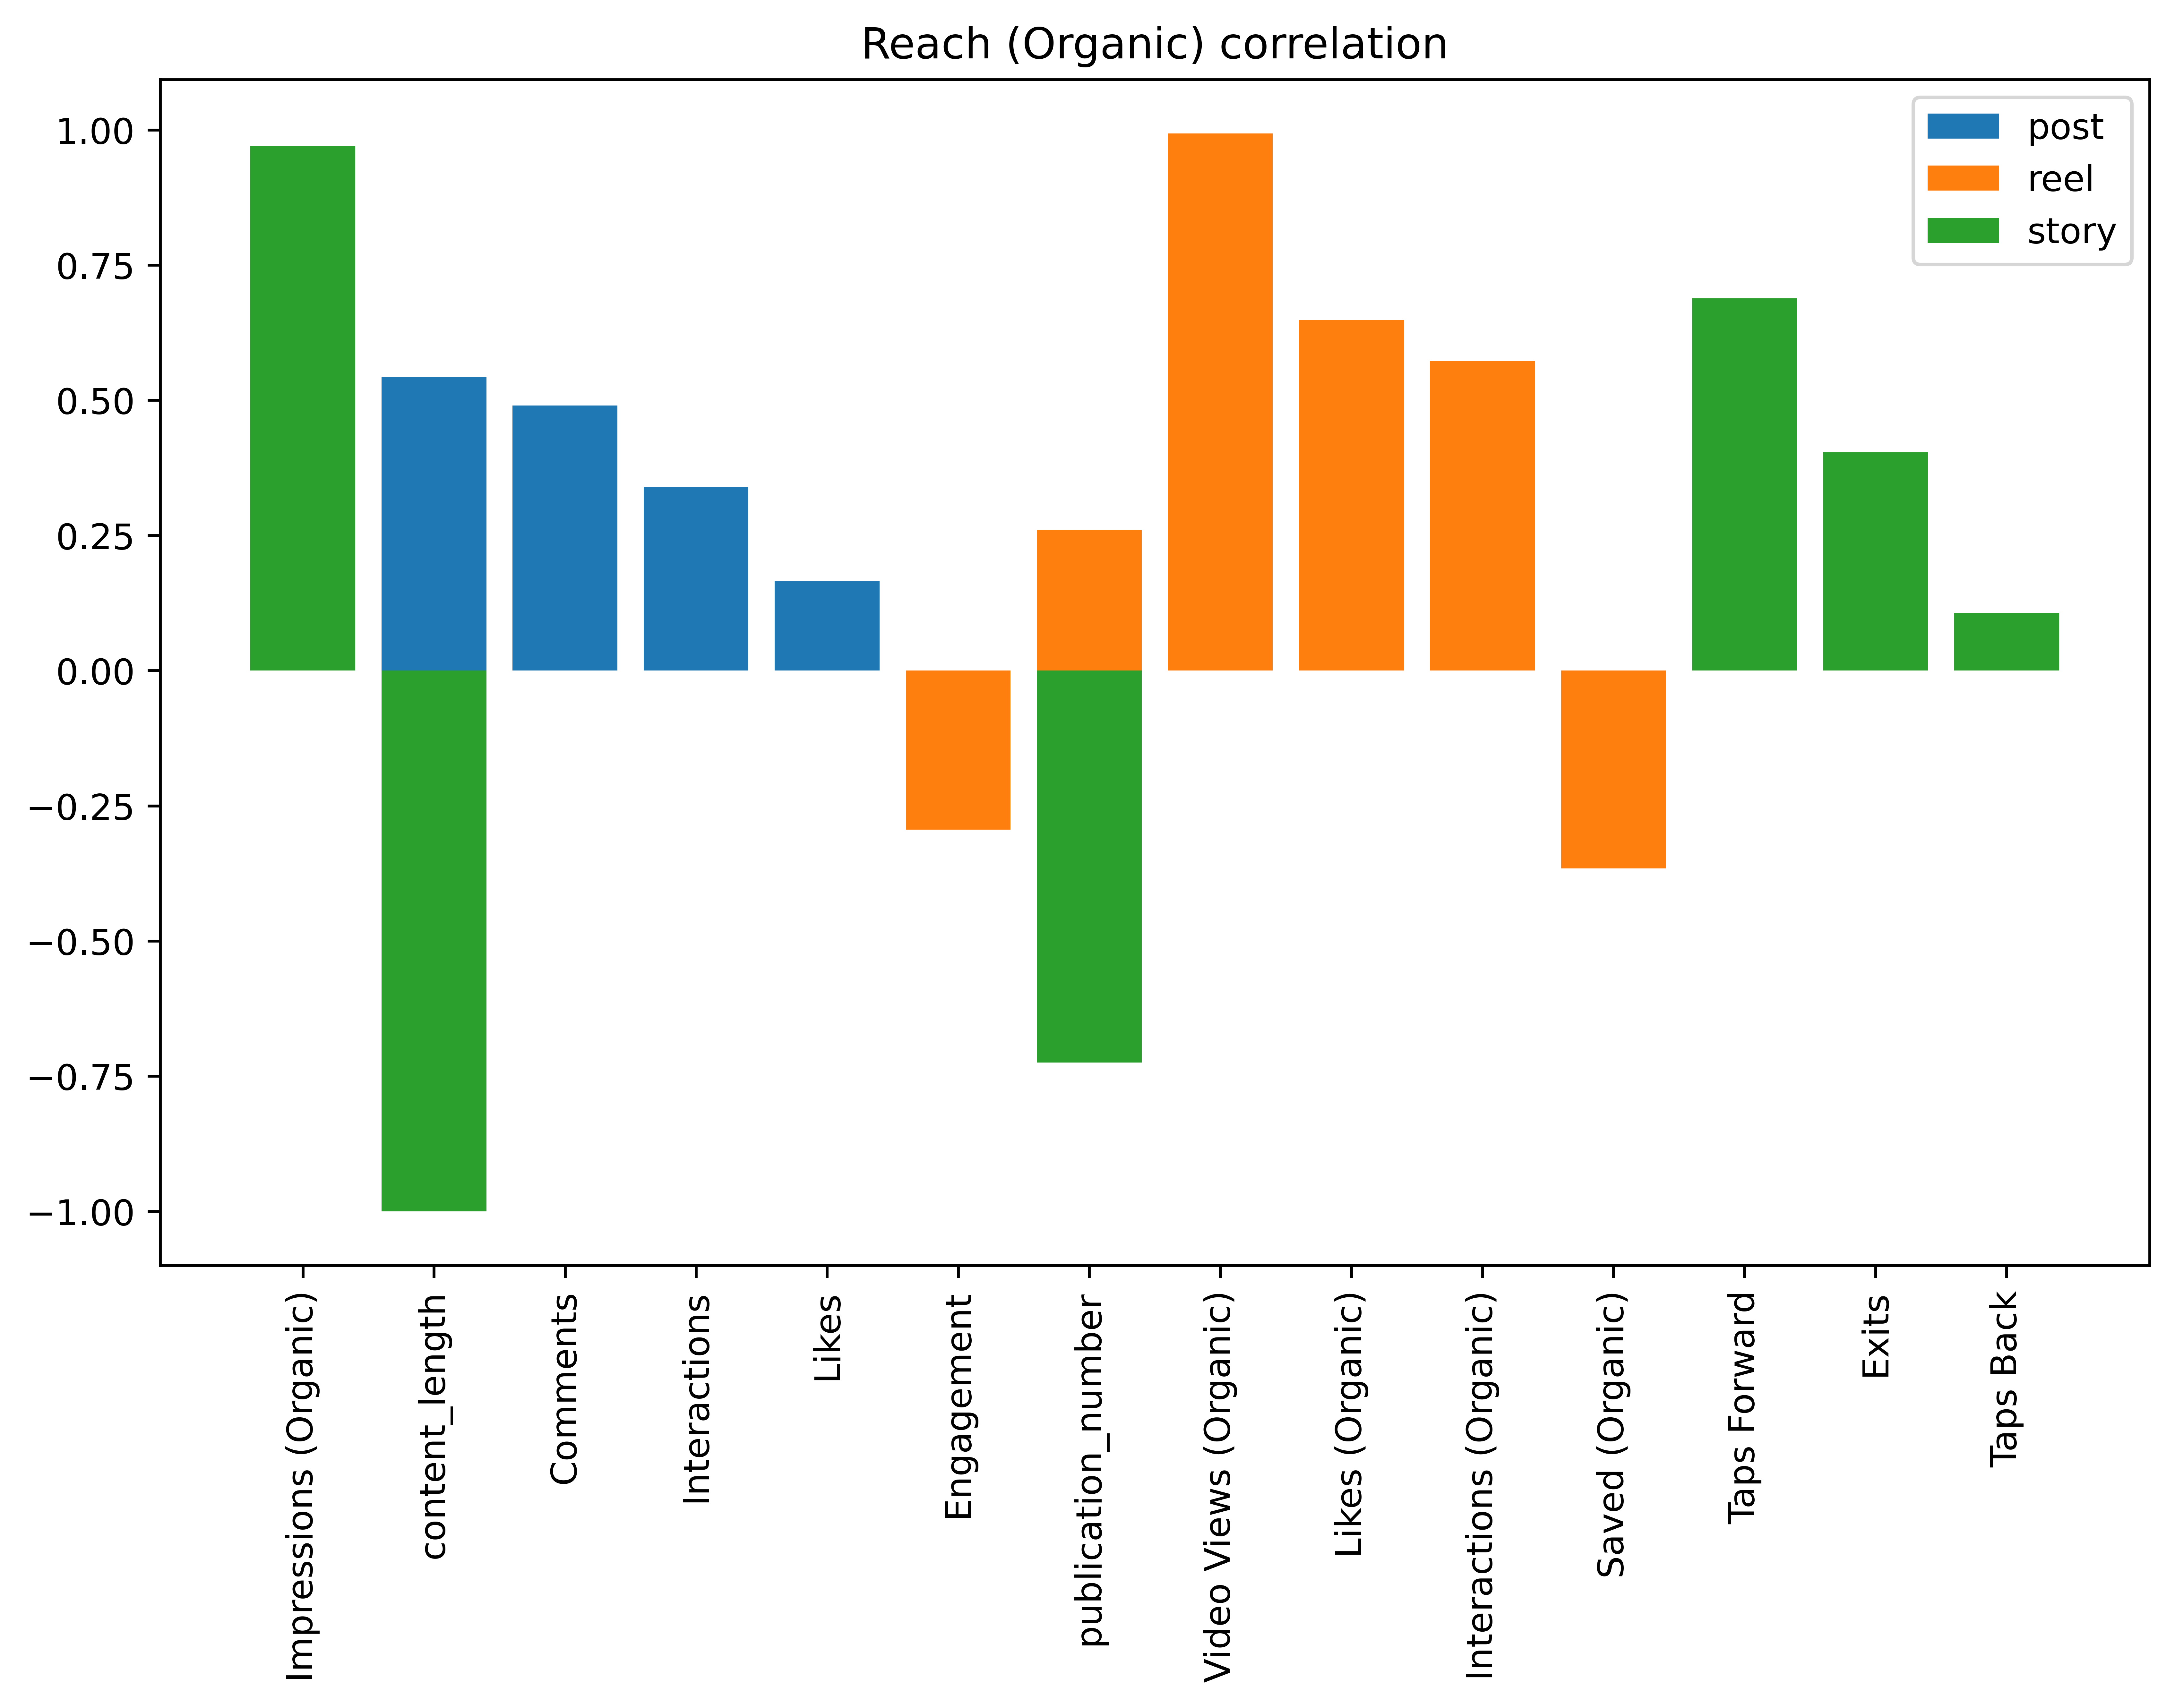

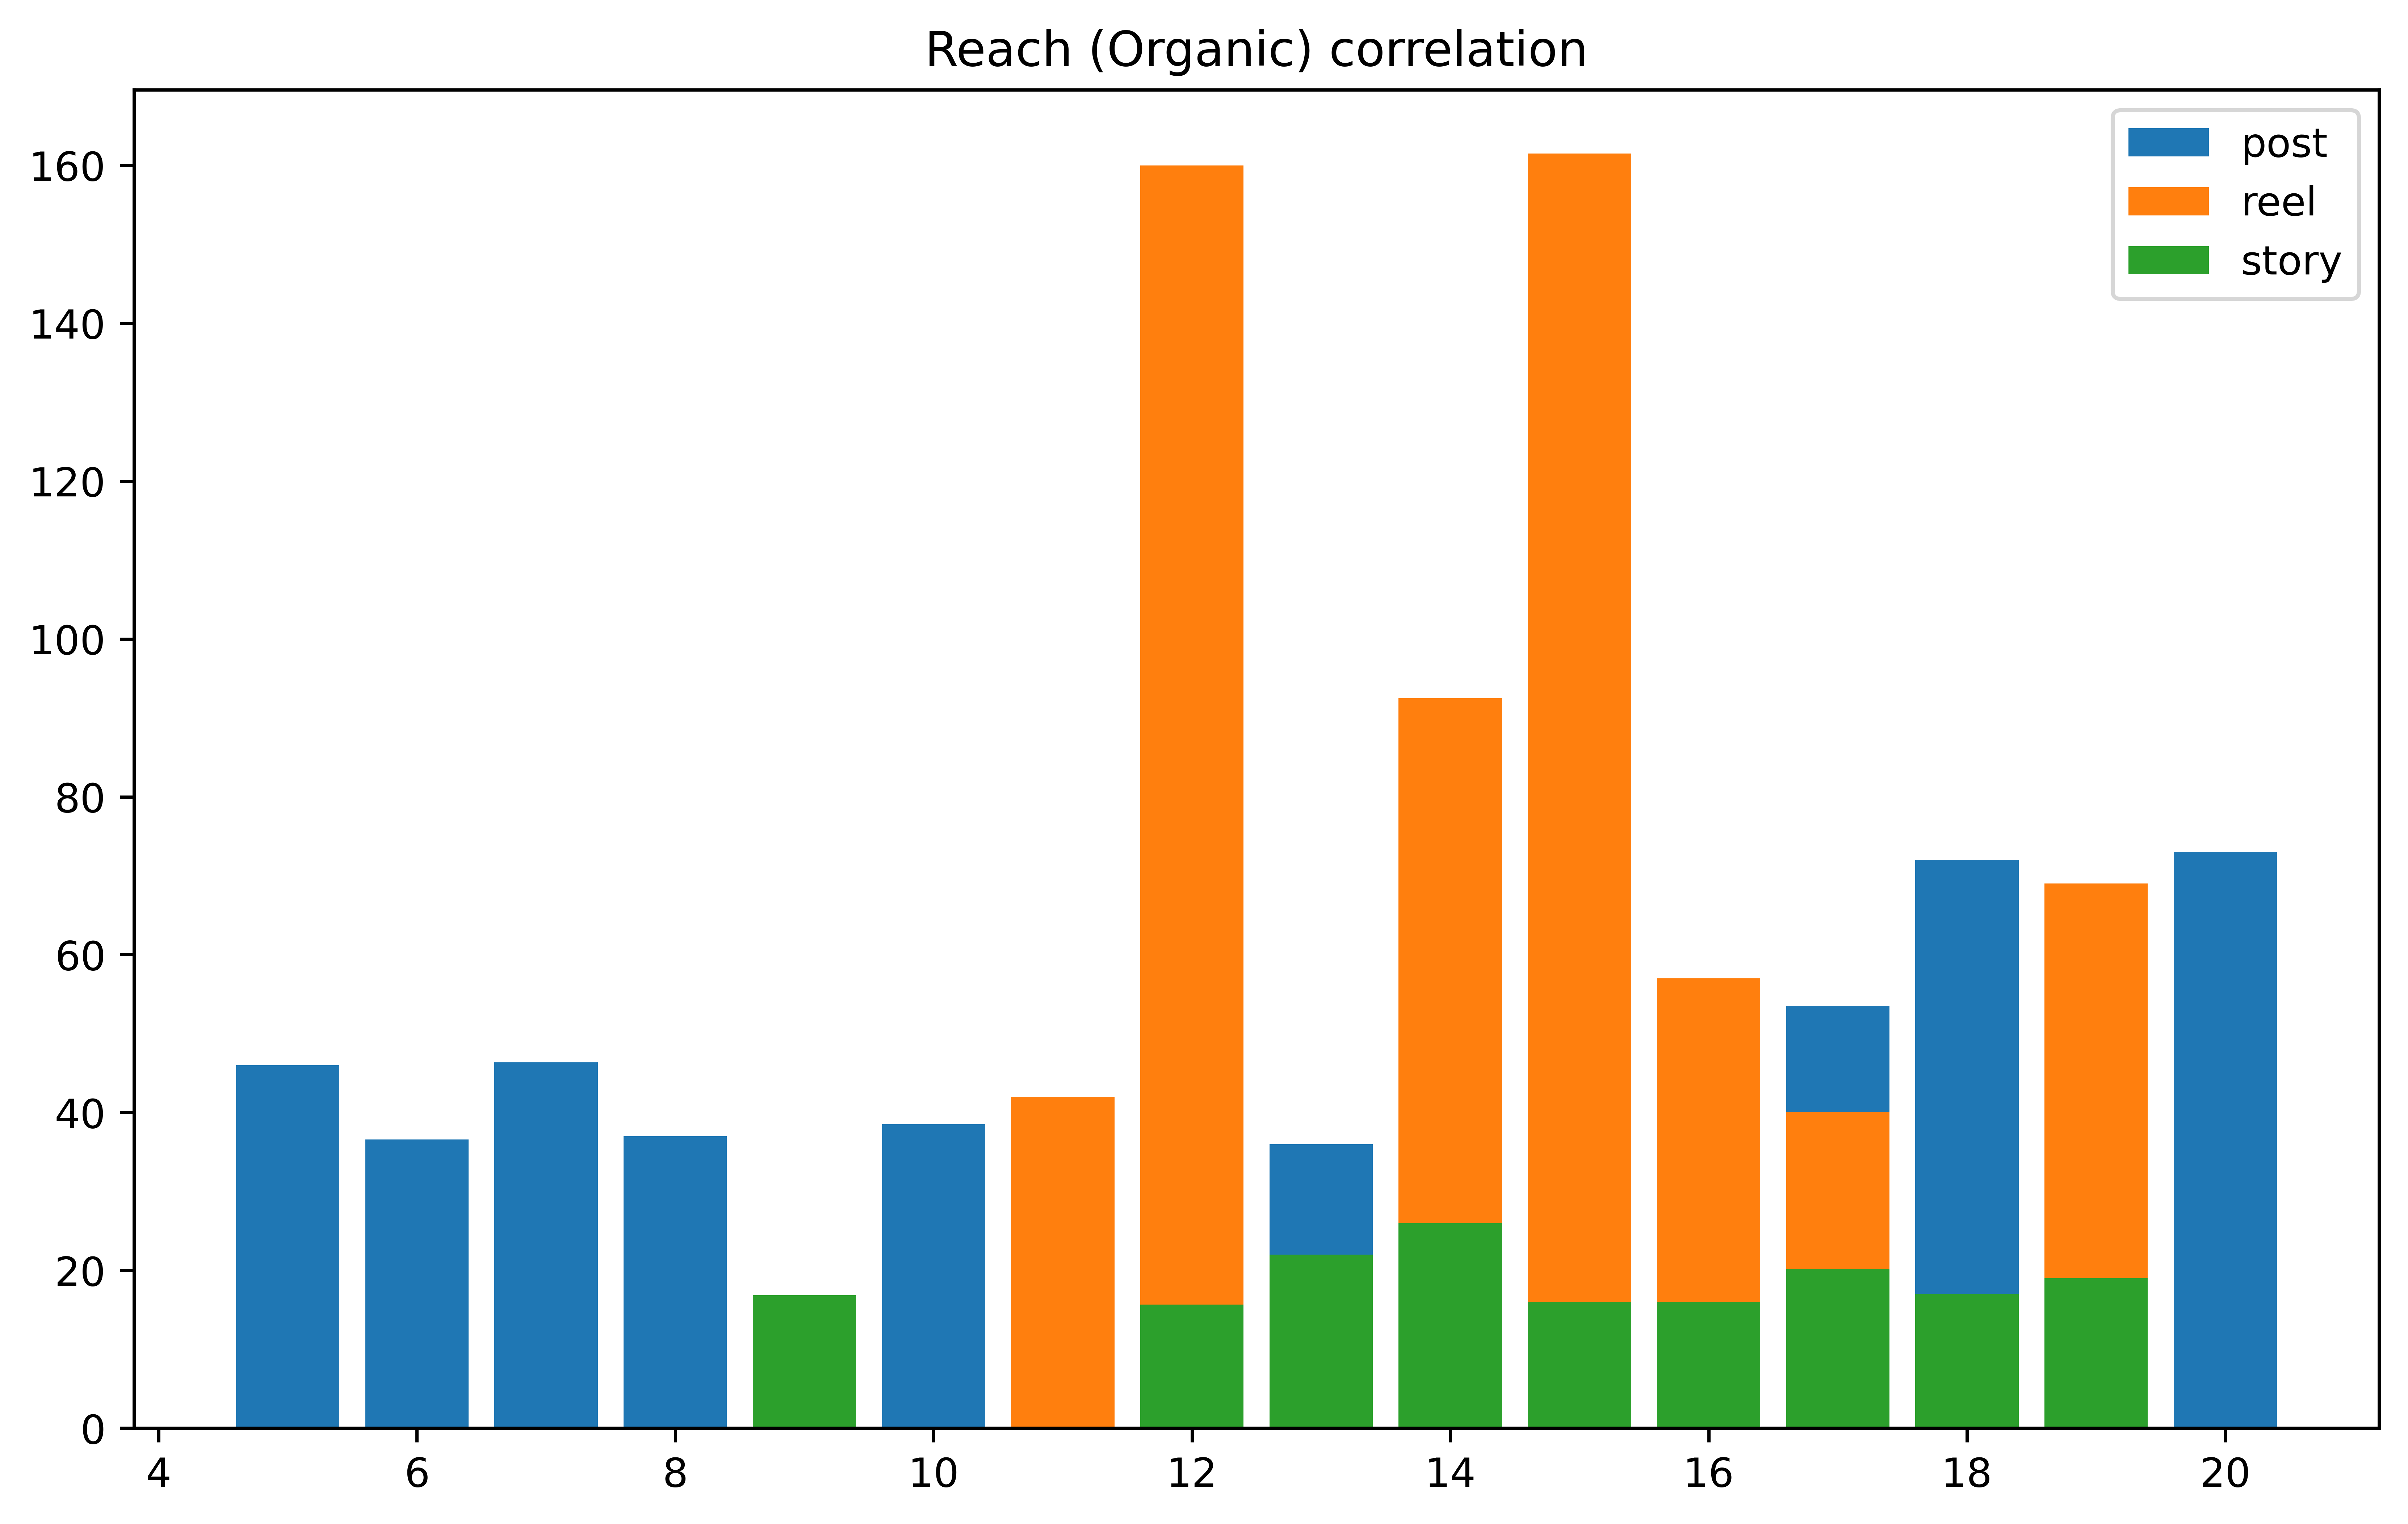

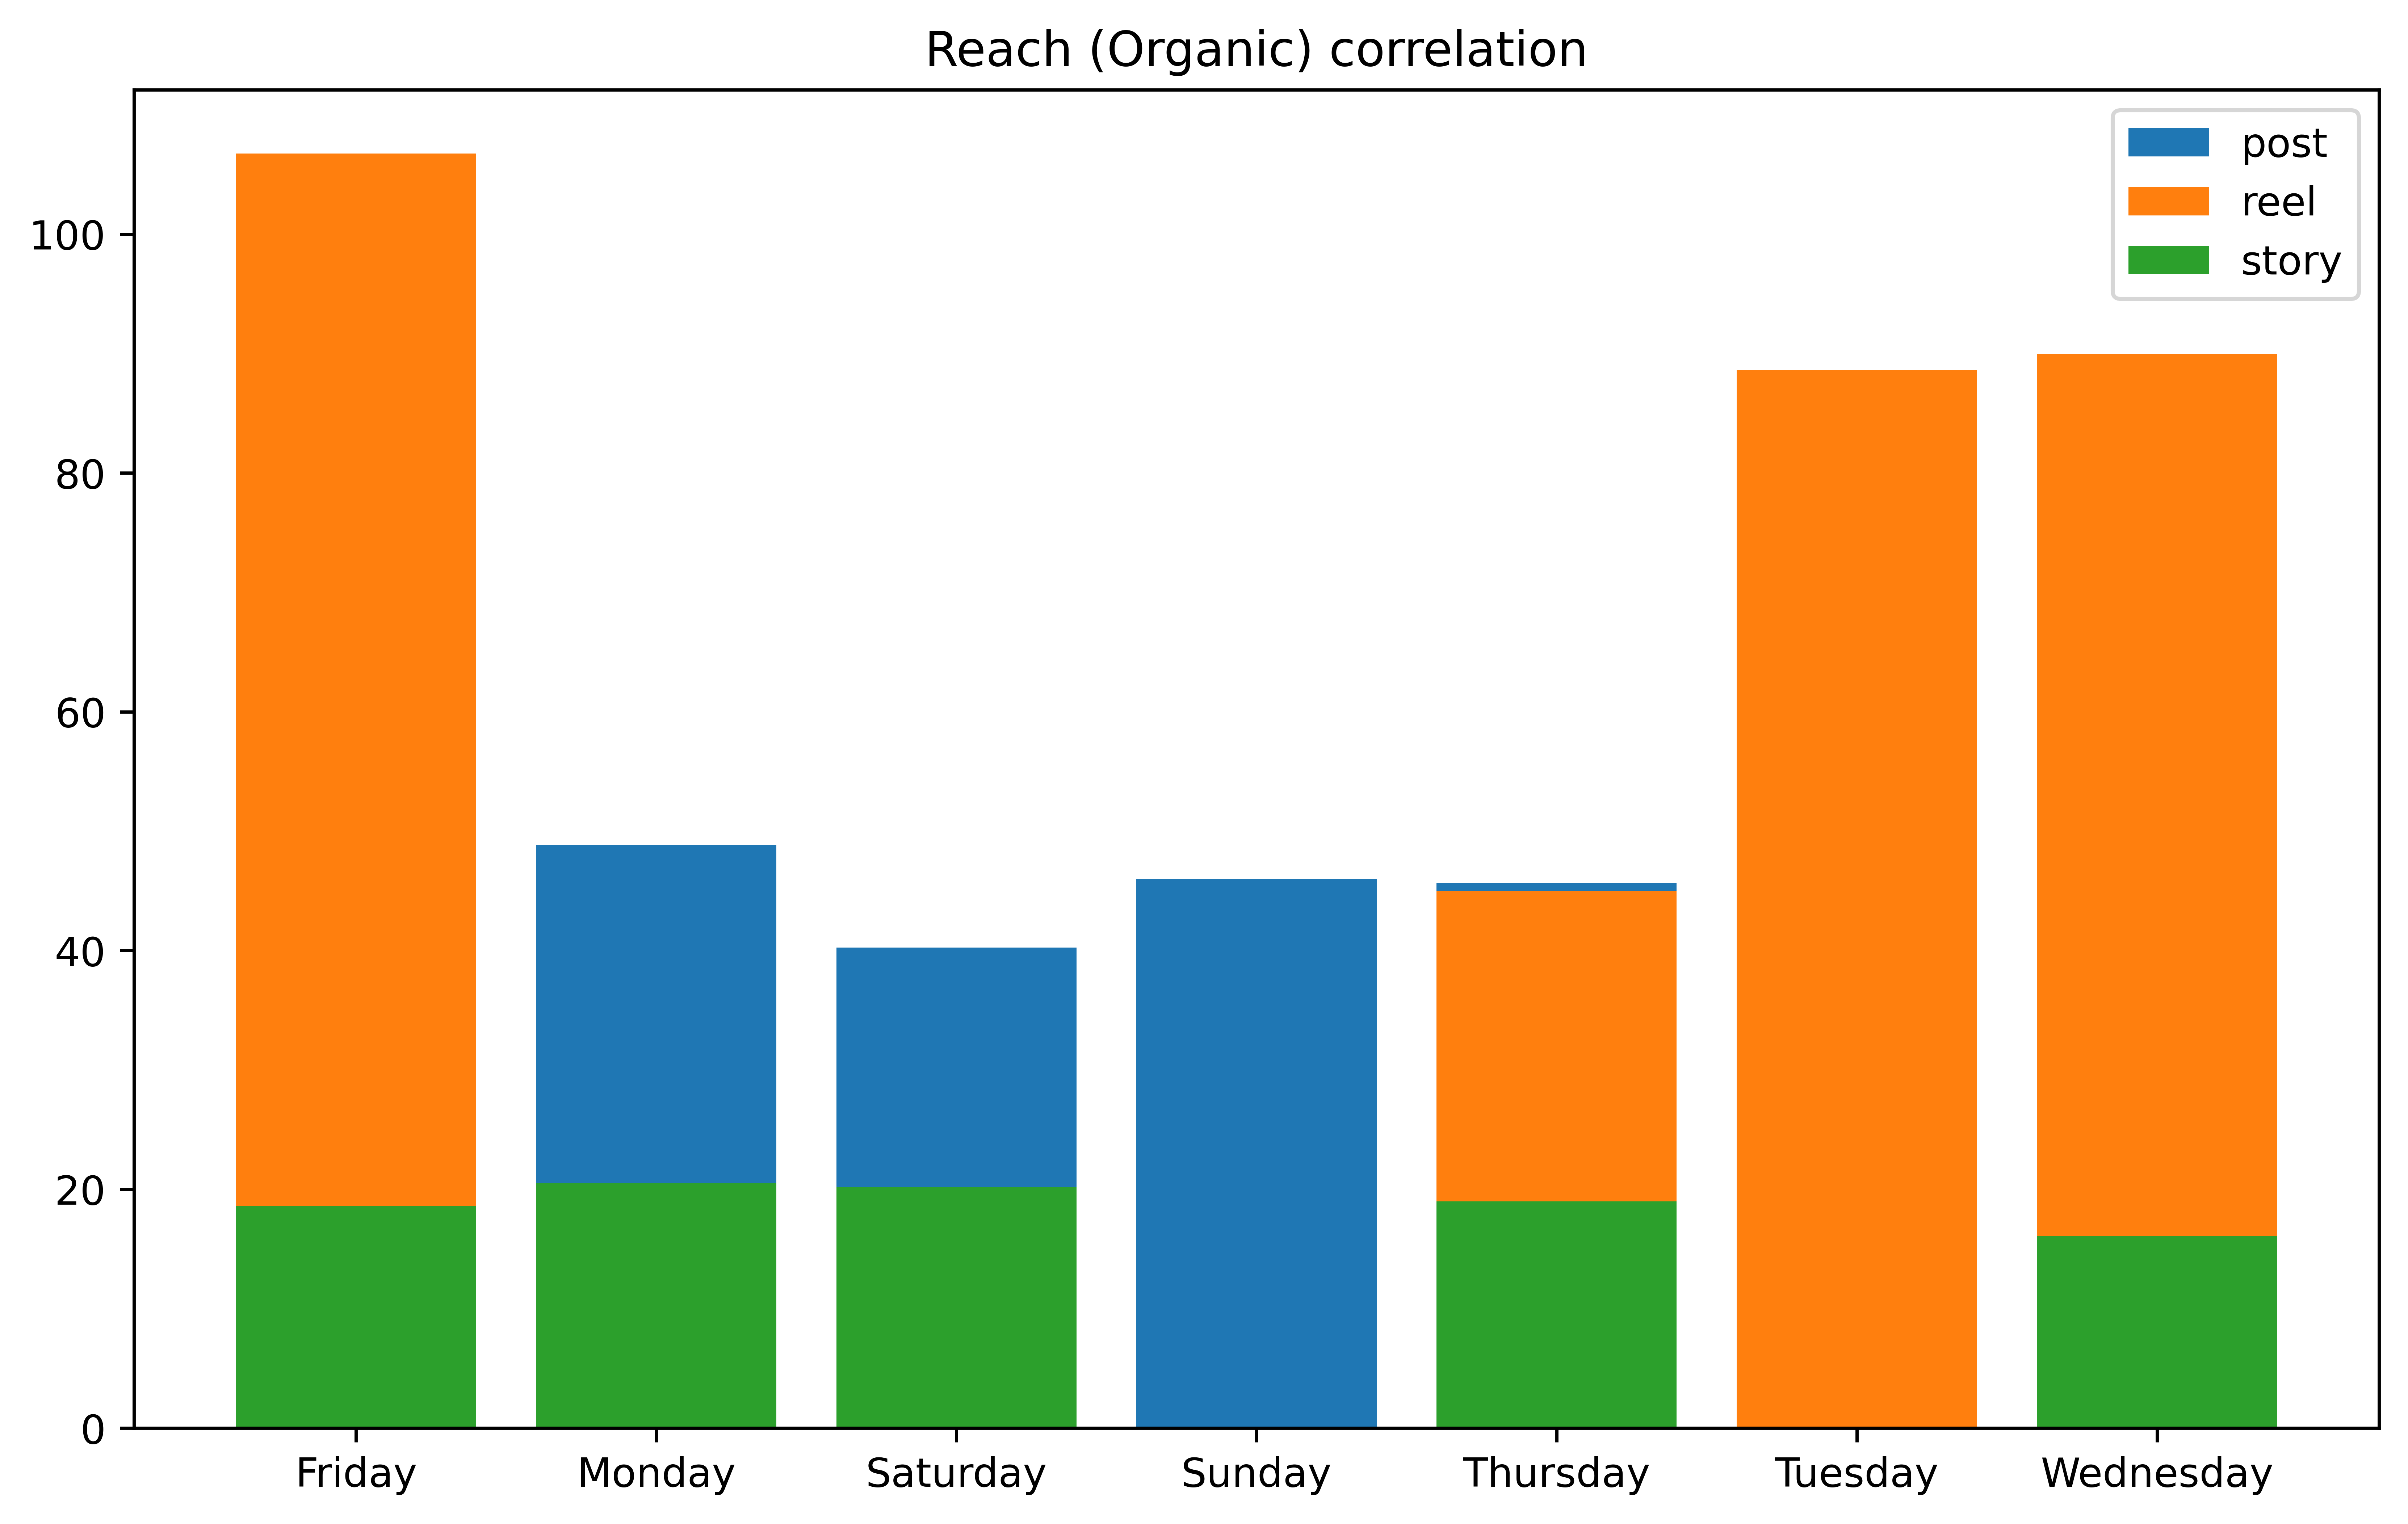

In [ ]:
# Plot different graph, allowing an analysis of the Reach during the communication campaign
plot.plot_chain(dfs_dict, 'Reach (Organic)', save_img_path=f'{IMG_PATH}/Reach')

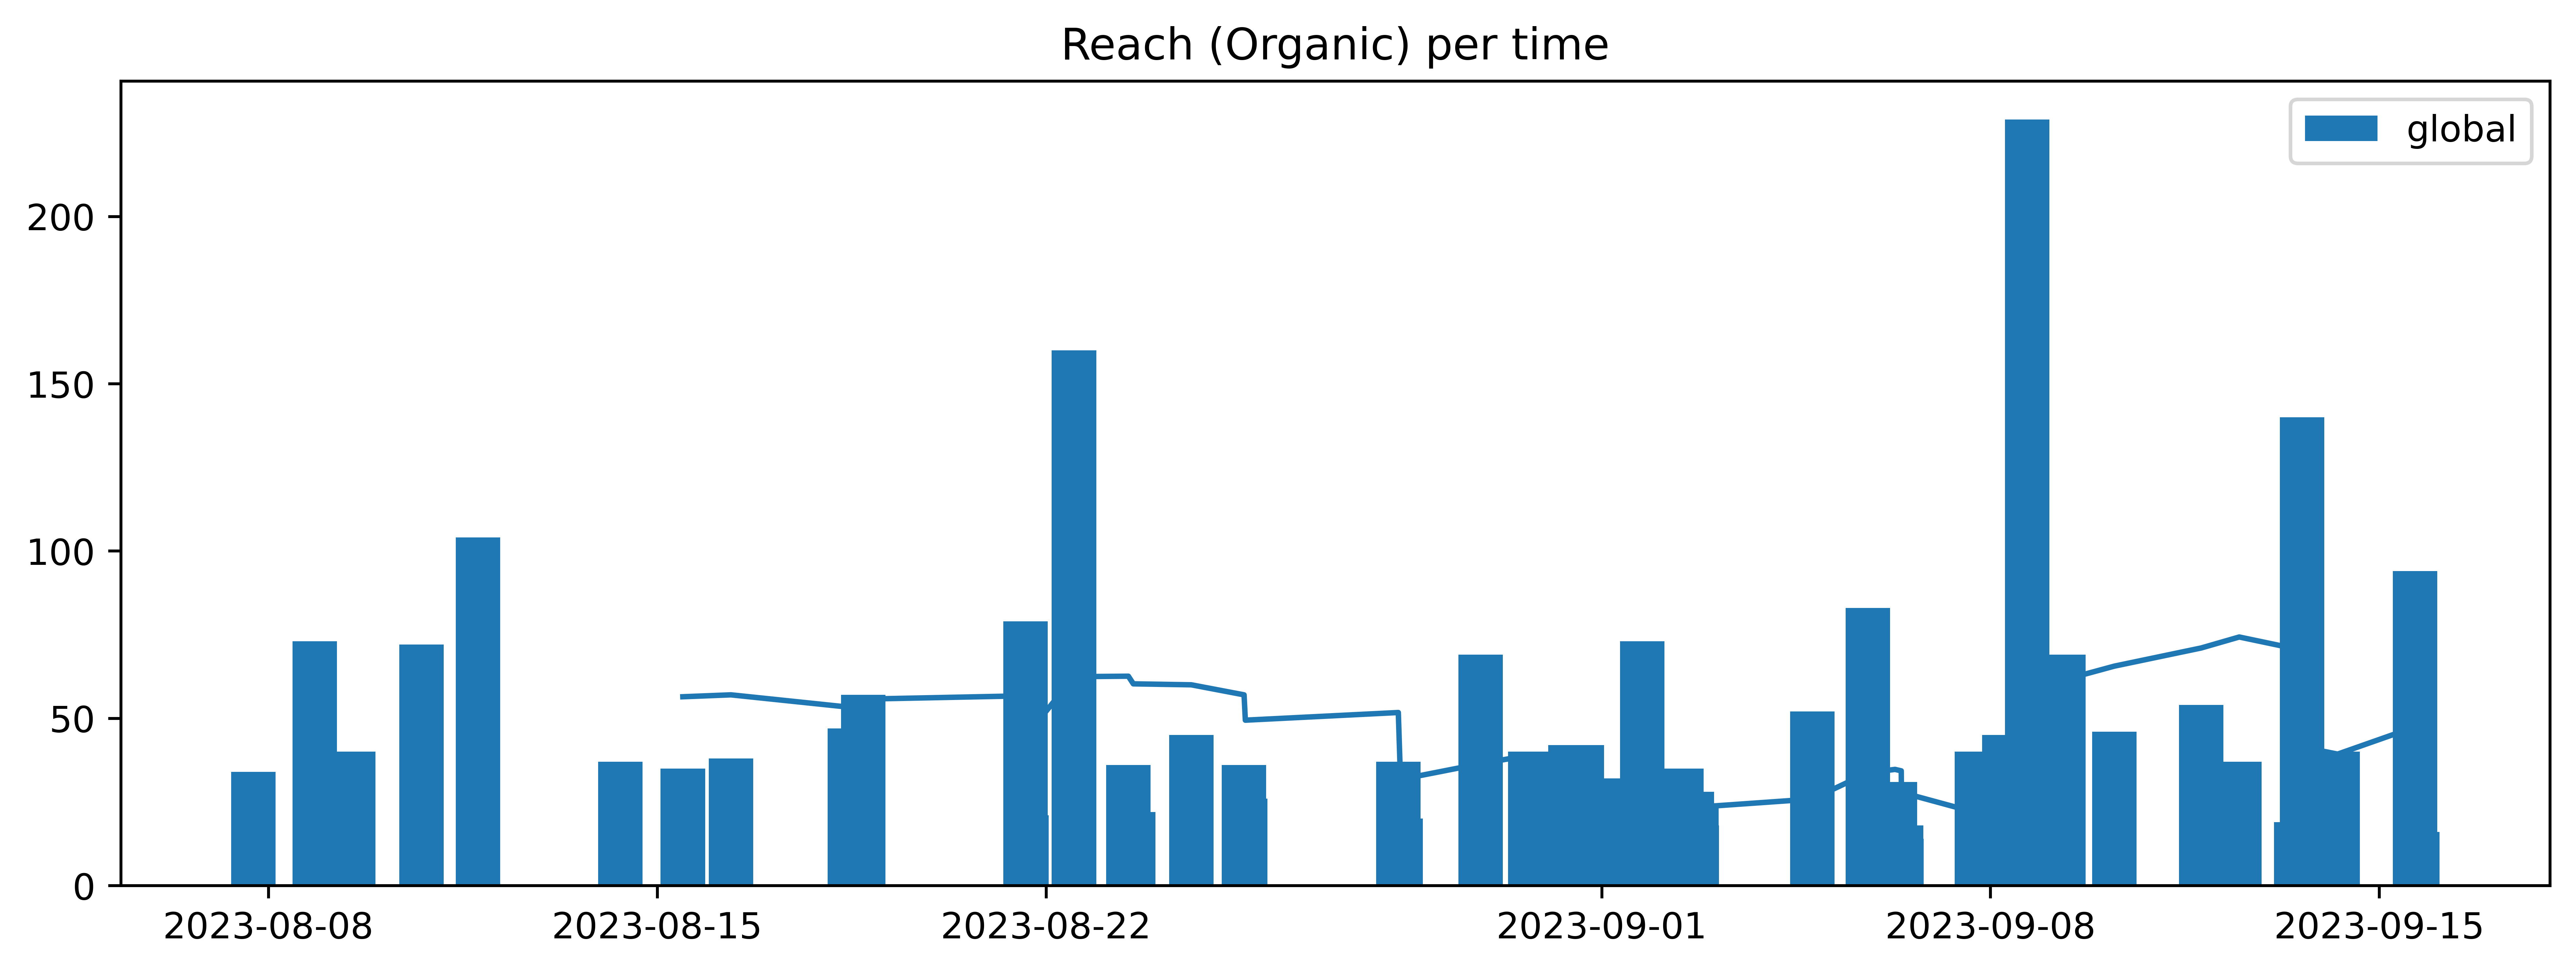

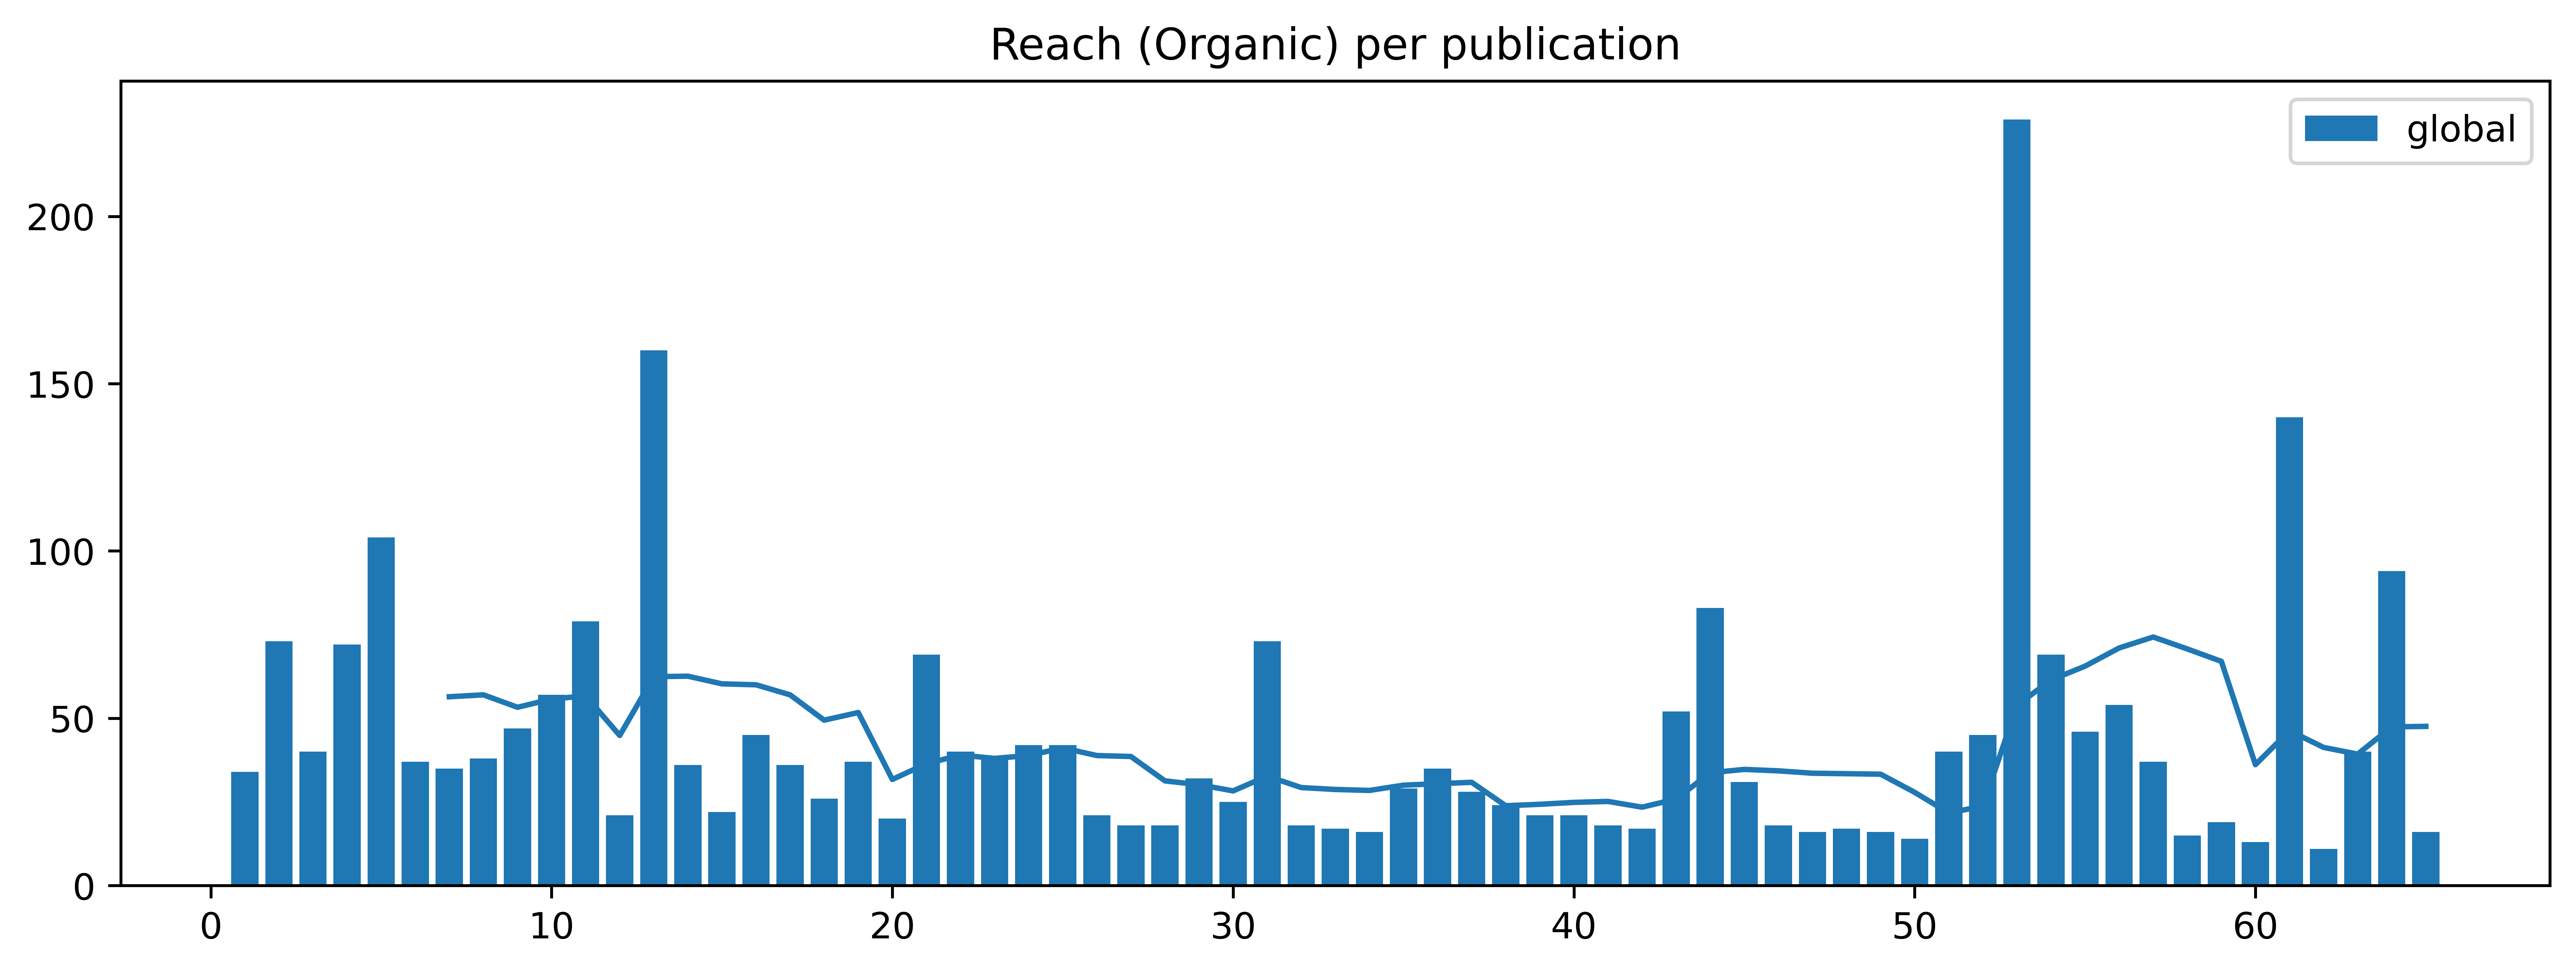

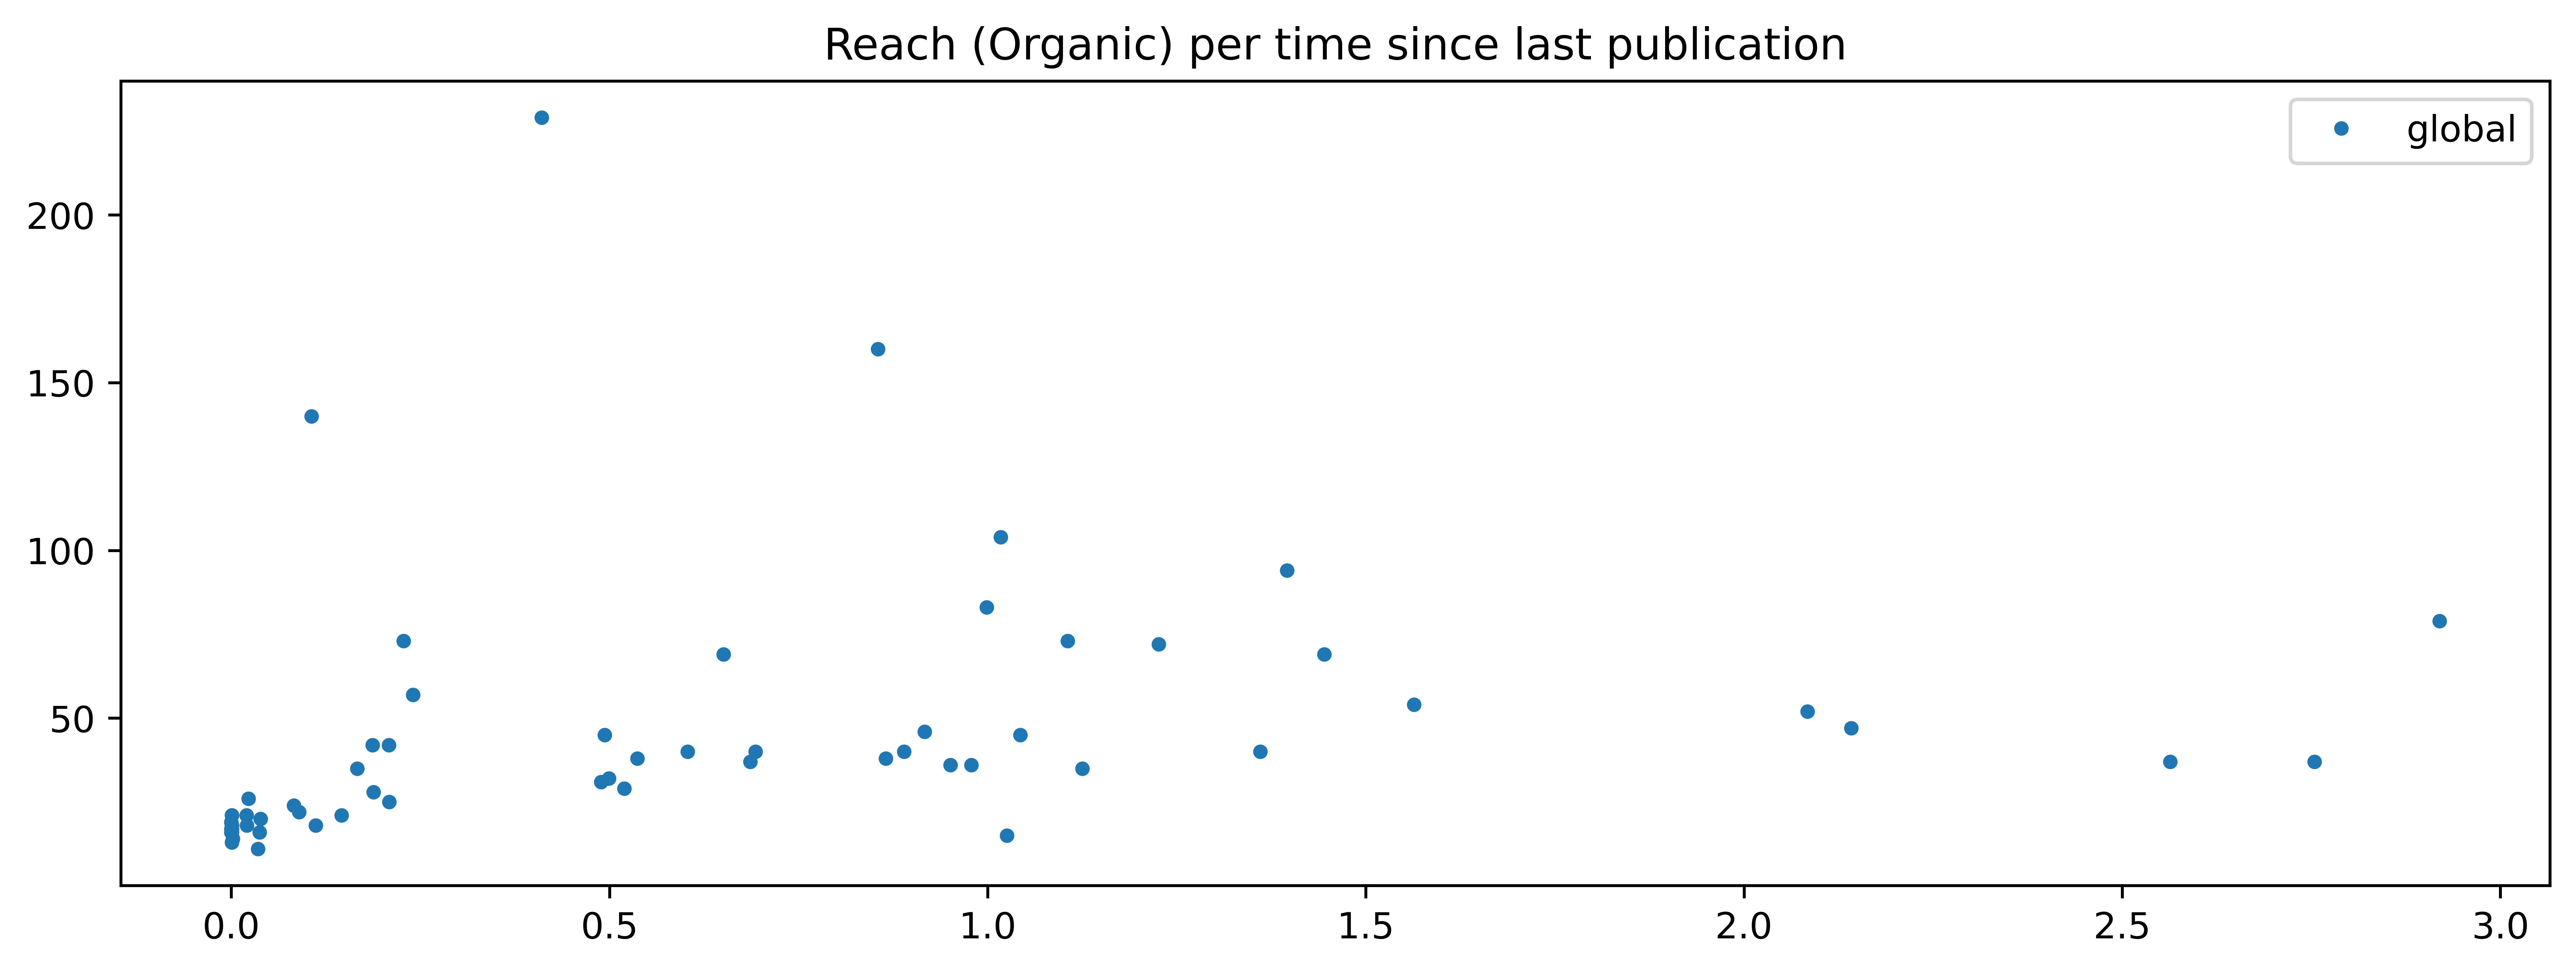

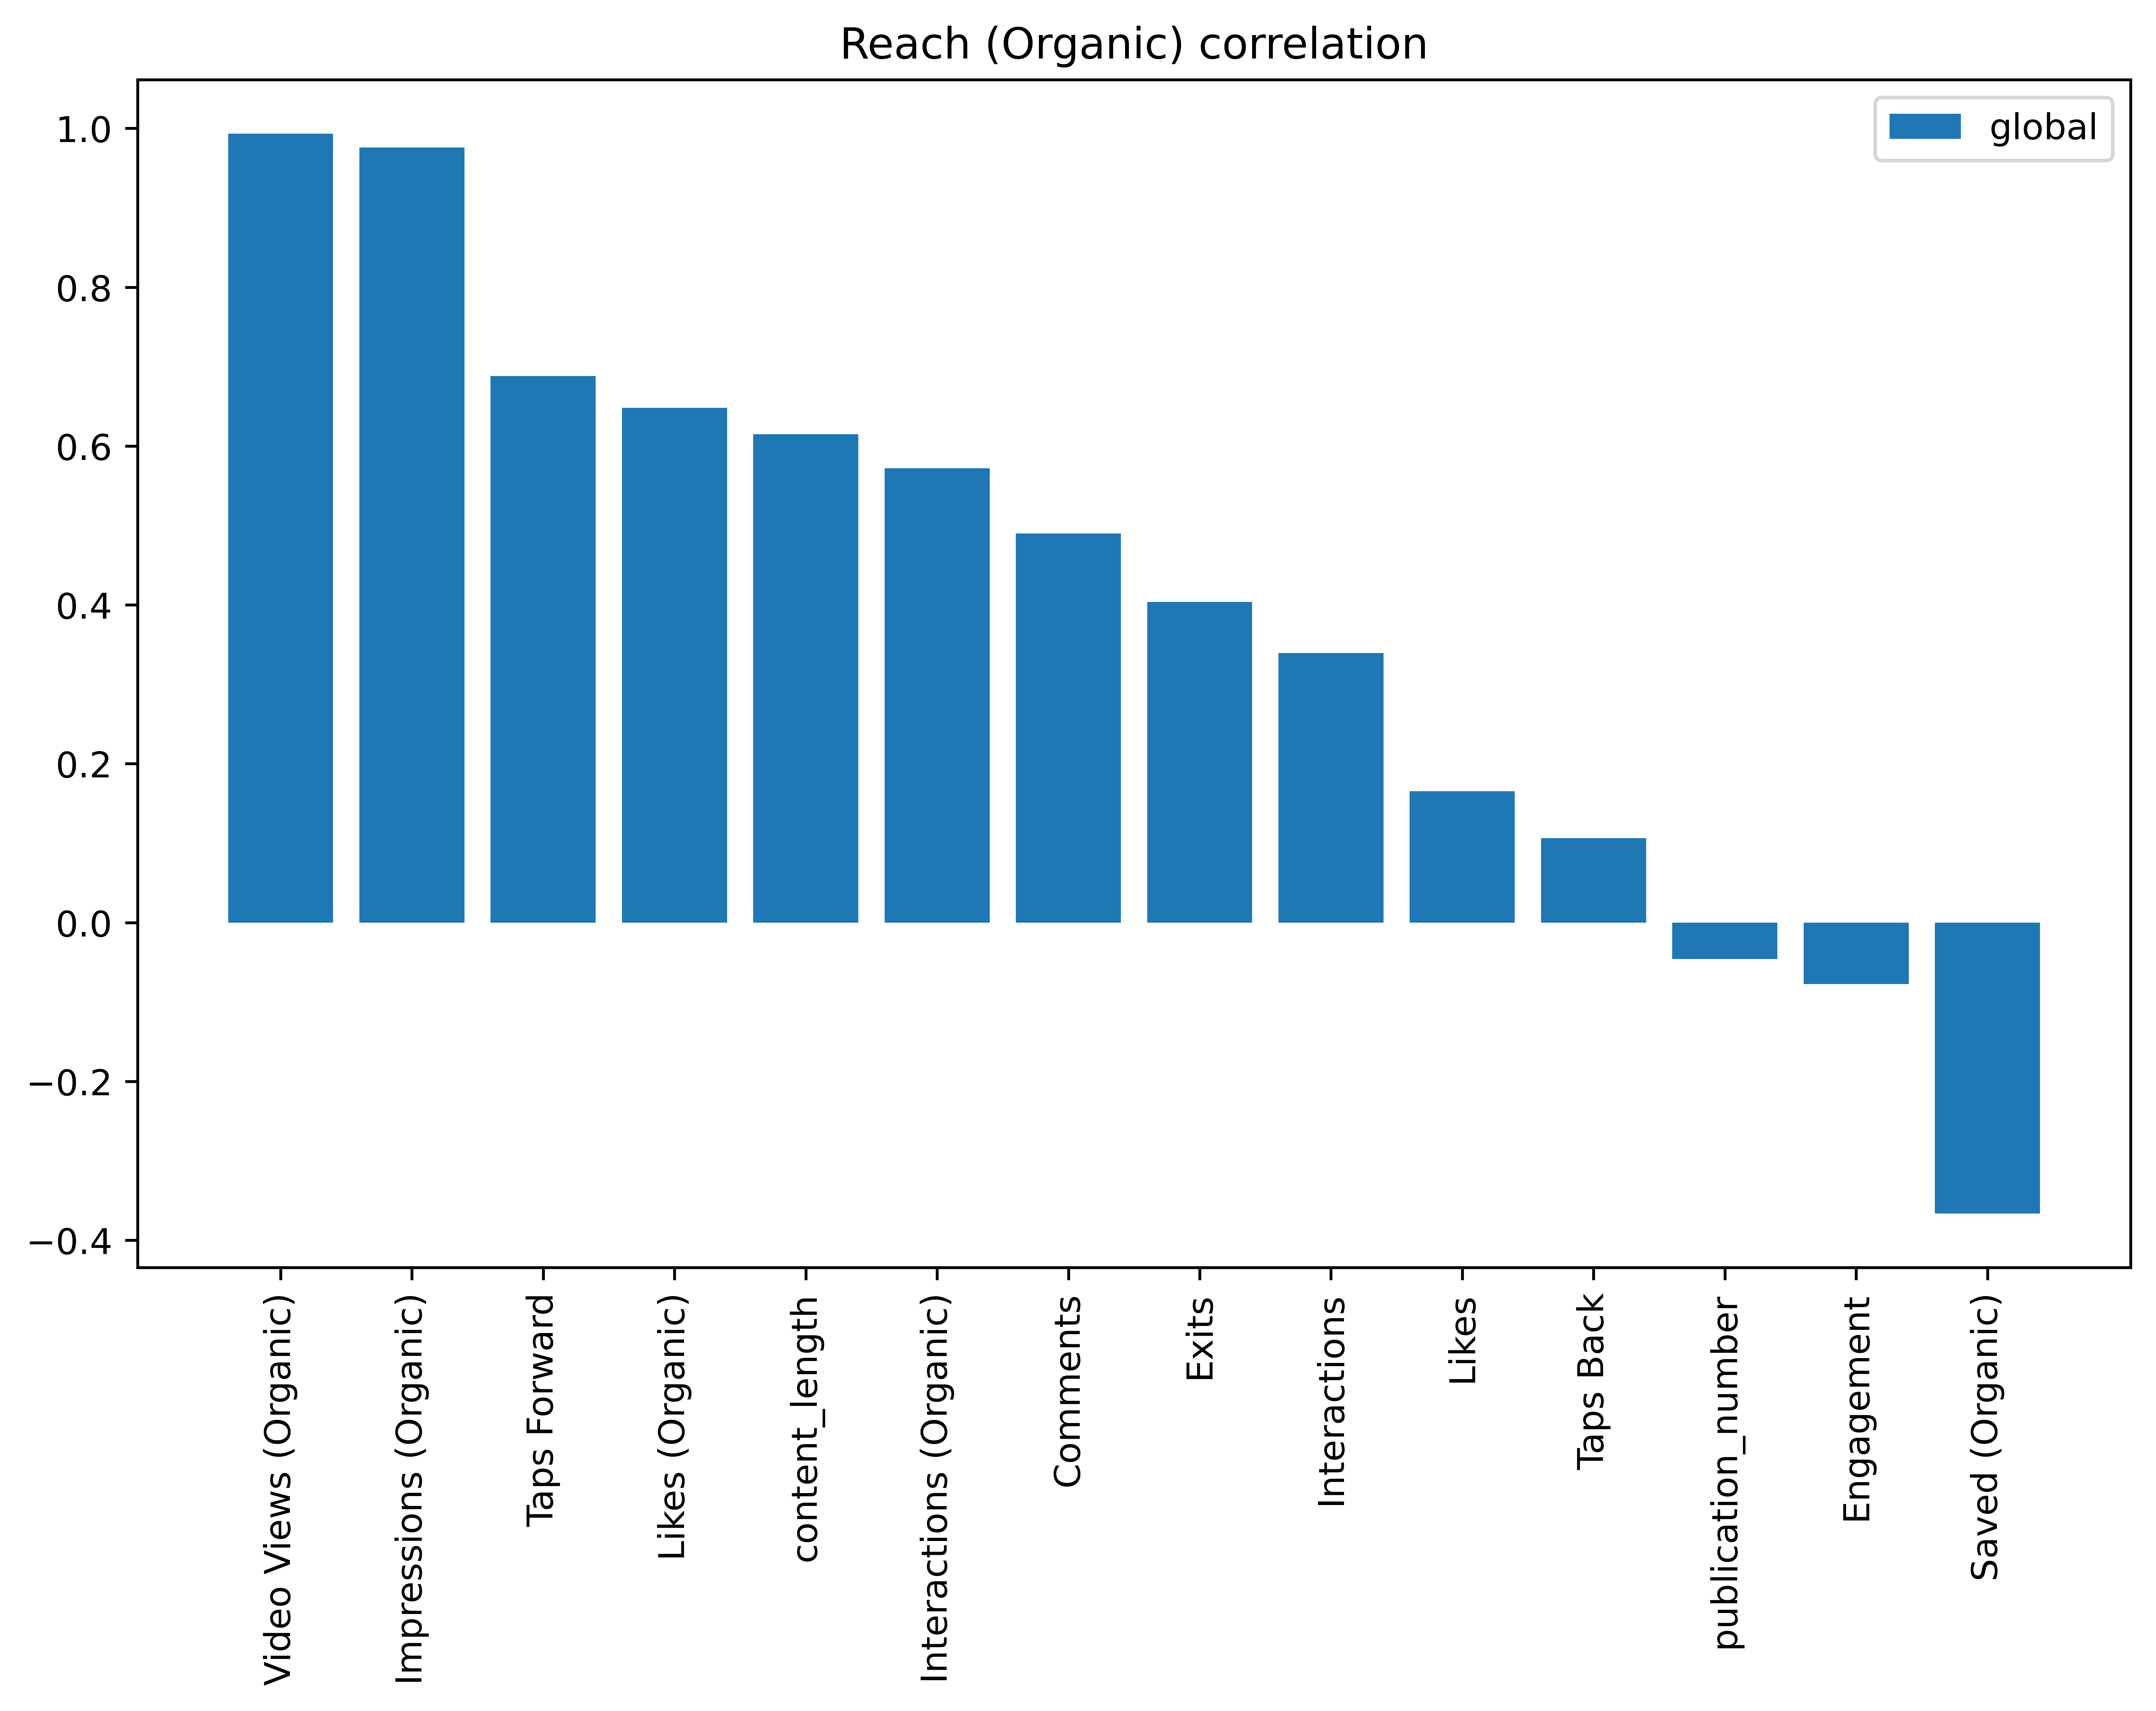

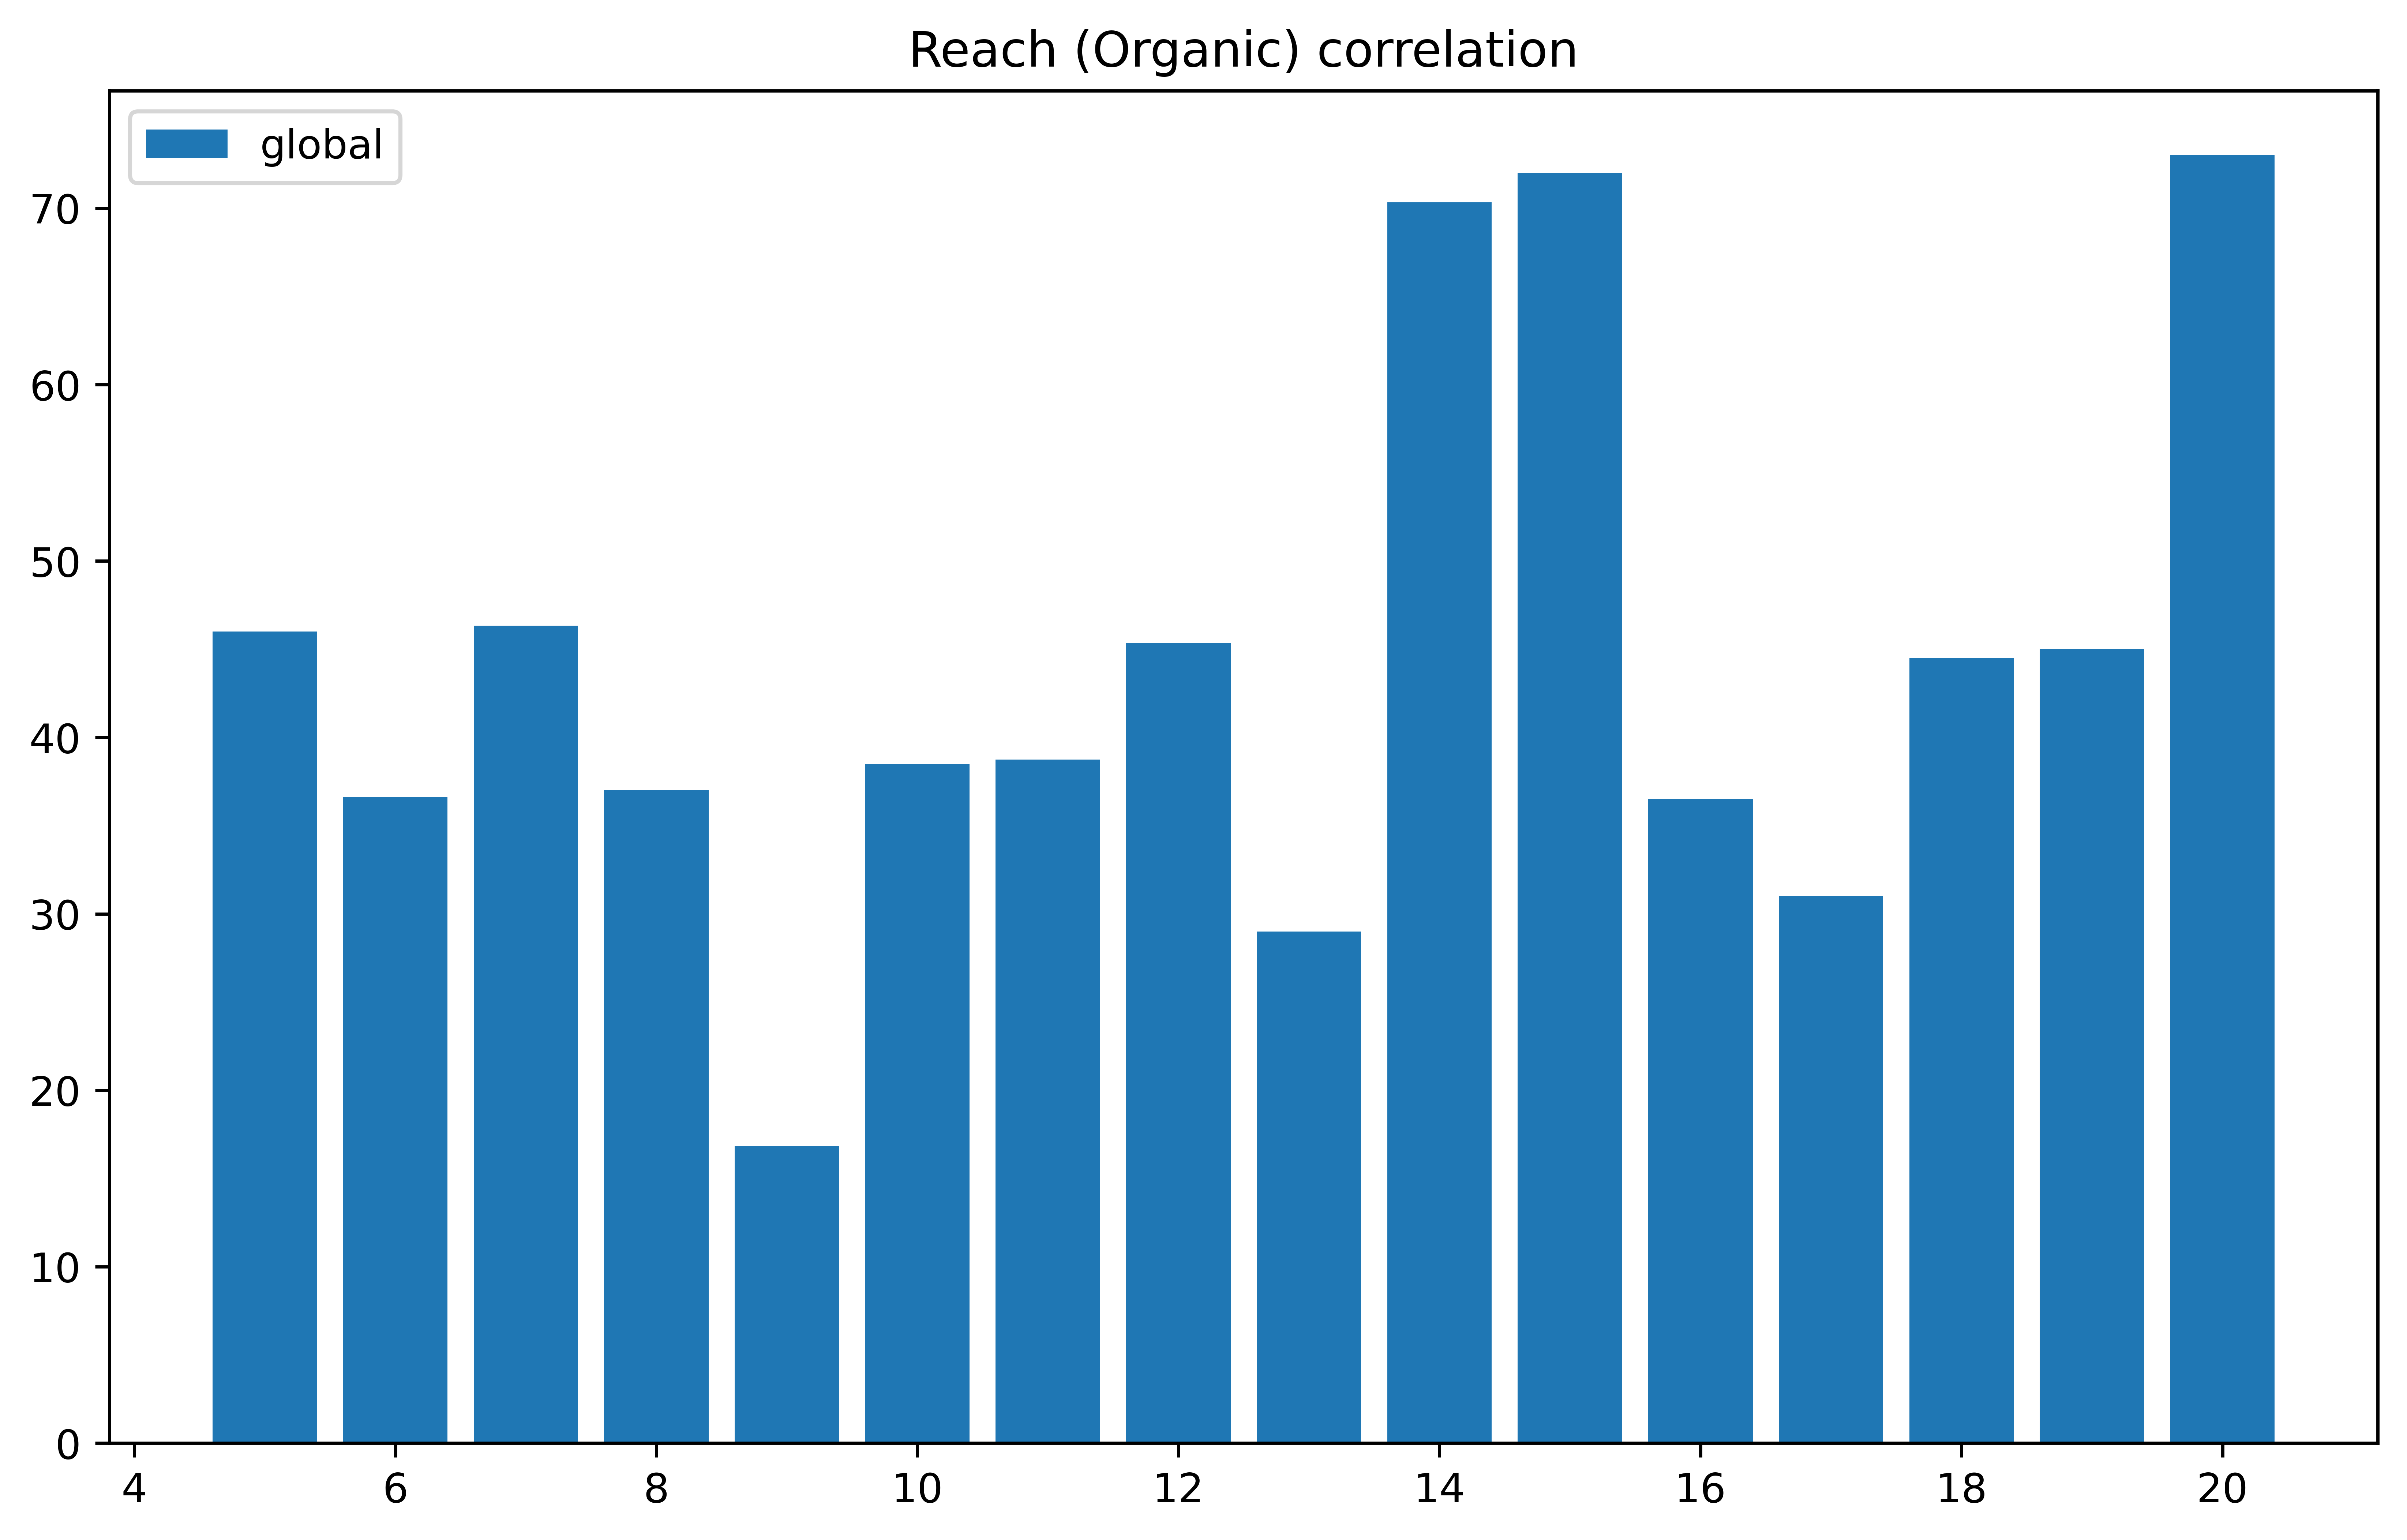

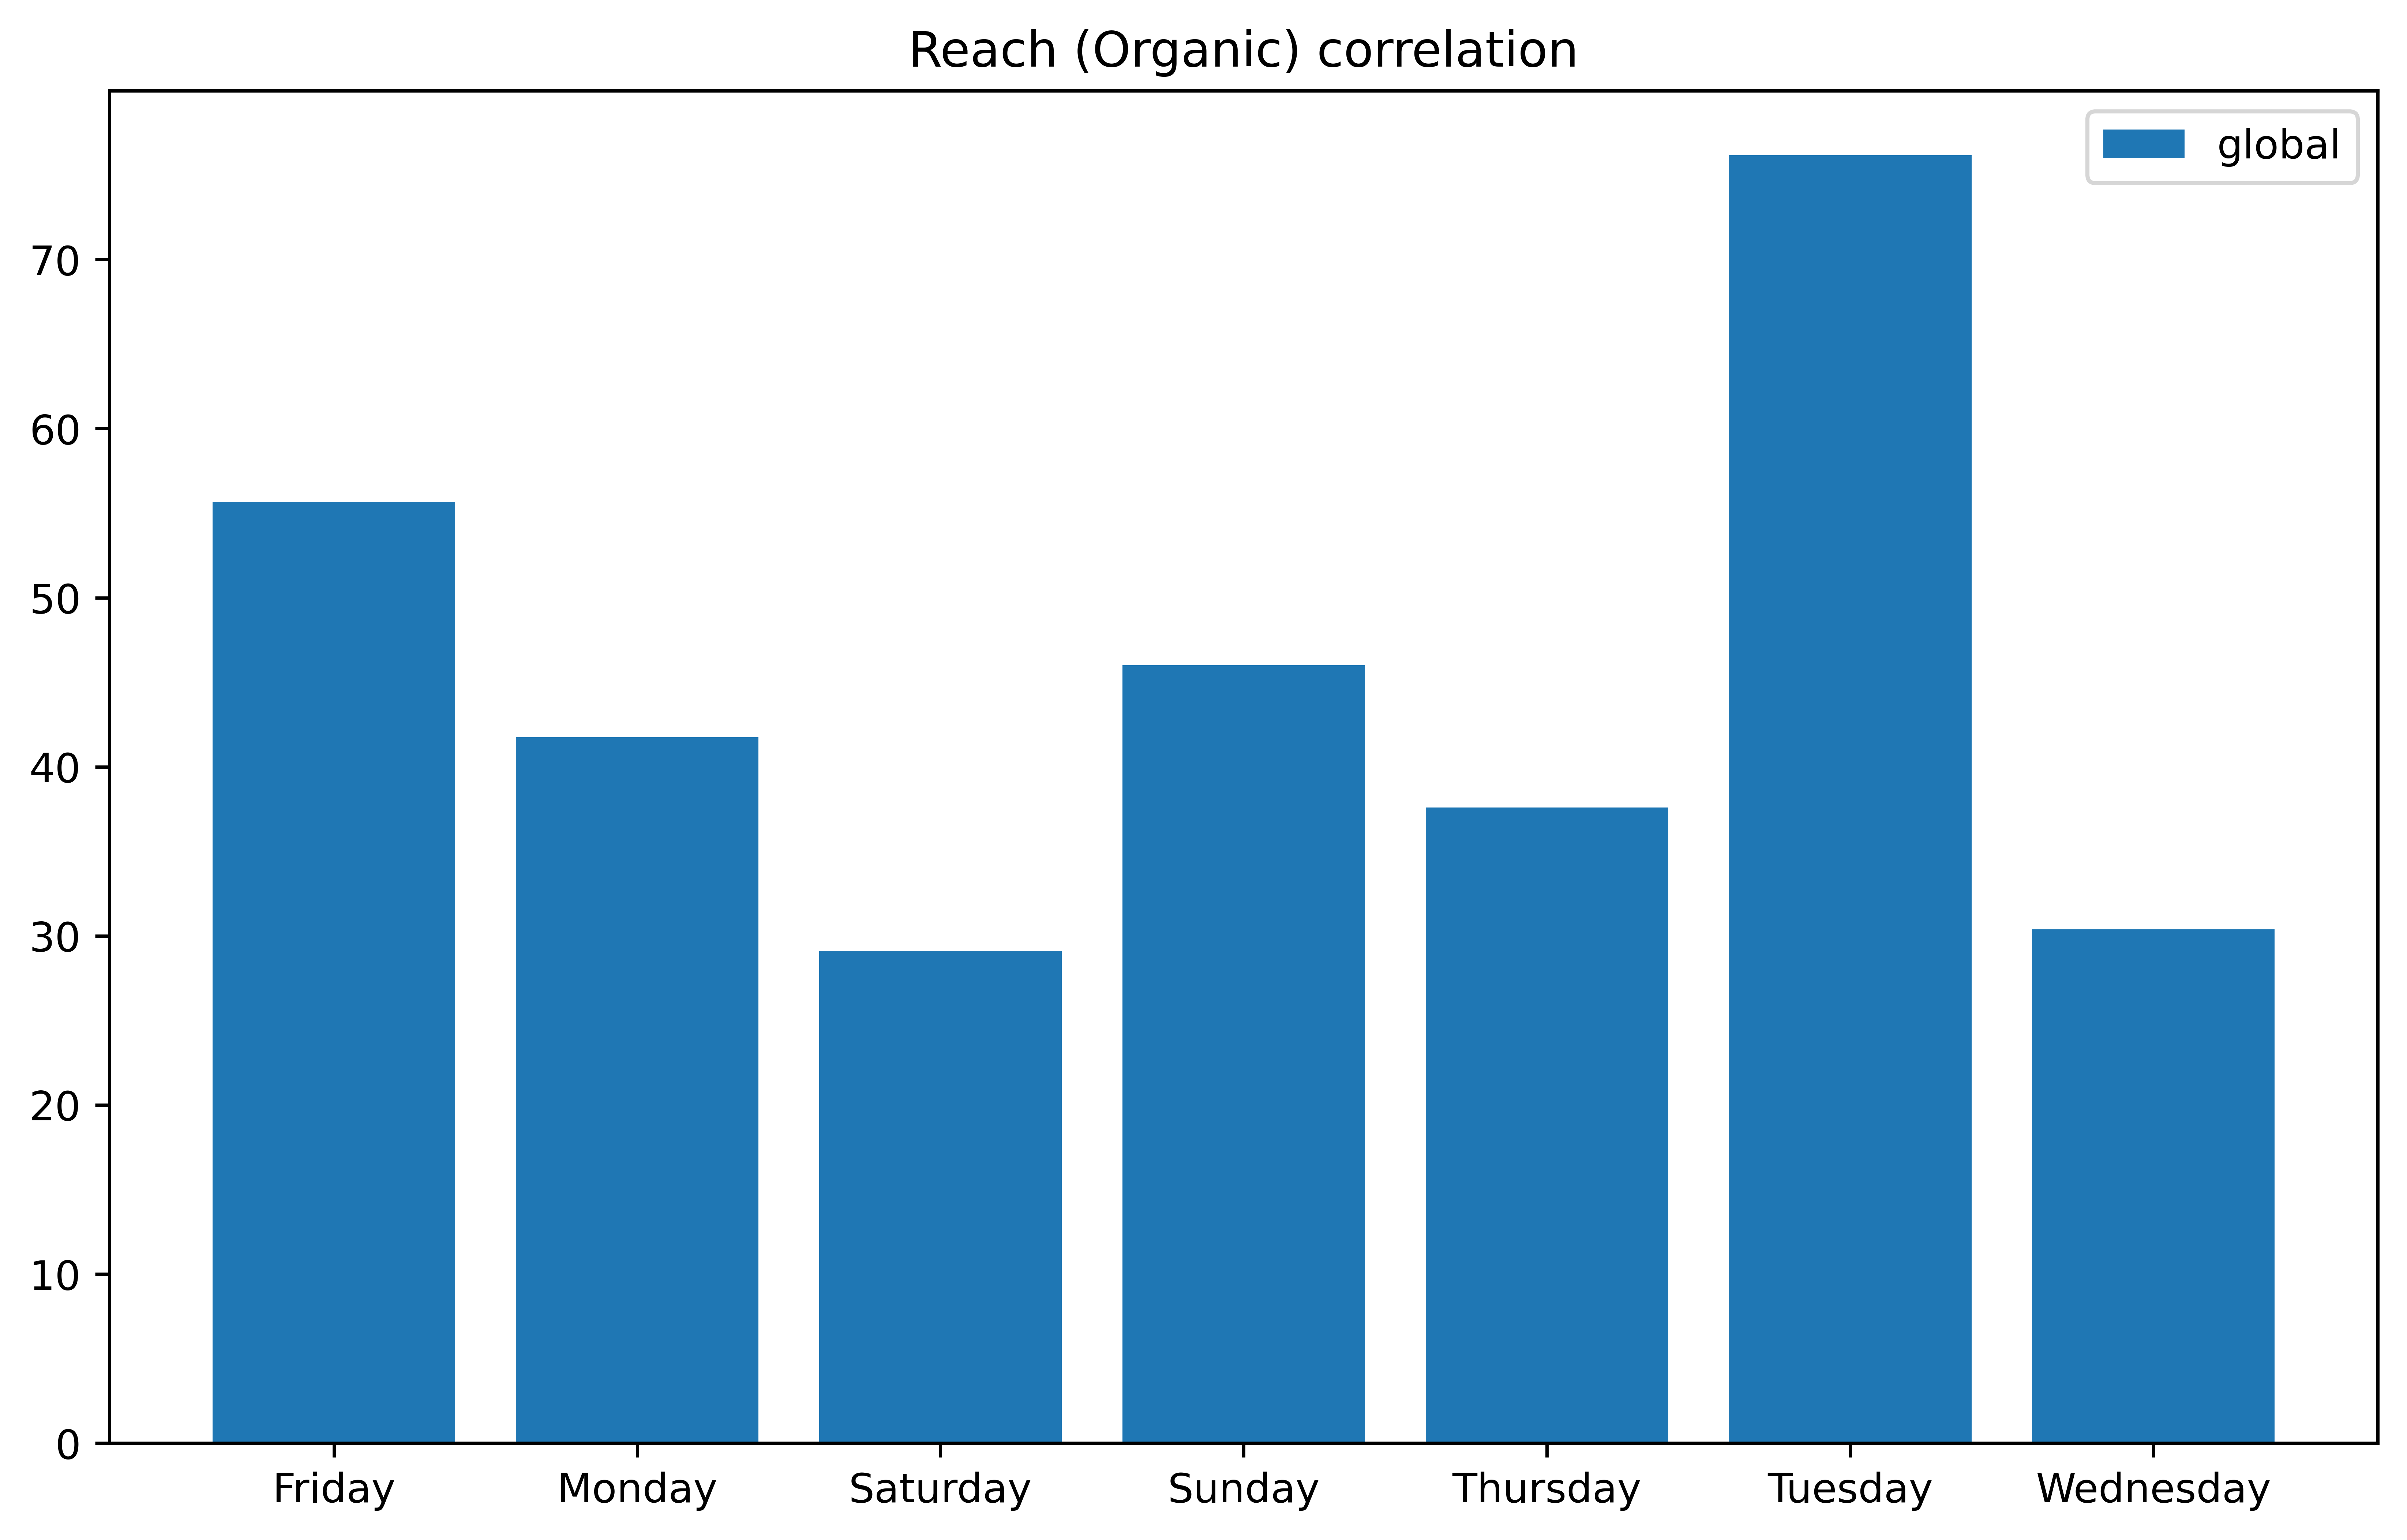

In [ ]:
# Plot different graph, allowing an analysis of the Reach during the communication campaign
plot.plot_chain(df_dict, 'Reach (Organic)', save_img_path=f'{IMG_PATH}/Reach')